# Predicción del espectro de respuesta a partir de datos in situ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

En el presente analisis exploratorio de datos se mostrará principalmente la necesidad de mezclar dos datasets distintos. En este caso se habla de los datasets de NGA West 2 que contiene una gran variedad de sismos corticales (Crustal) en el mundo, y el dataset Colombiano que contiene registros sismicos corticales, de subducción y profundos de eventos sismicos ocurridos en Colombia y cercanías. <br>
Se abordará la necesidad de aumentar la variabilidad de aquella información que se tiene por ambas partes.

## EDA NGA West2

In [2]:
df = pd.read_excel('C:/Users/elias/OneDrive/Desktop/MachineLearning/FinalProjectDL/Final_Project/Updated_NGA_West2_Flatfile_RotD50EDITADO.xlsx')
df

Record Sequence Number  Hypocenter Latitude (deg)  \
0                           1                   46.61000   
1                           2                   46.62000   
2                           3                   40.40000   
3                           4                   32.90000   
4                           5                   40.30000   
...                       ...                        ...   
21293                   21536                   37.86037   
21294                   21537                   37.86037   
21295                   21538                   37.86037   
21296                   21539                   37.86037   
21297                   21540                   35.81700   

       Hypocenter Longitude (deg)  Station Latitude  Station Longitude  \
0                      -111.96000          46.58000          -112.0300   
1                      -111.97000          46.59000          -112.0400   
2                      -125.10000          40.57600          -124.2630   
3                      -115.21700          32.79400          -115.5490   
4                      -124.80000          40.57600          -124.2630   
...                           ...               ...                ...   
21293                  -122.23589          37.58230          -122.4201   
21294                  -122.23589          37.40370          -122.1760   
21295                  -122.23589          37.58640          -122.5022   
21296                  -122.23589          37.94910          -122.4085   
21297                  -120.36500          35.21263          -120.8553   

       Hypocenter Depth (km)     Earthquake Name  Magnitude Magnitude Type  \
0                      6.000  Helena, Montana-01        6.0             Mw   
1                      6.000  Helena, Montana-02        6.0              U   
2                     10.000         Humbolt Bay        5.8             Mw   
3                     16.000  Imperial Valley-01        5.0              U   
4                     10.000  Northwest Calif-01        5.5             Mw   
...                      ...                 ...        ...            ...   
21293                  8.465            51177103        3.6             Mw   
21294                  8.465            51177103        3.6             Mw   
21295                  8.465            51177103        3.6             Mw   
21296                  8.465            51177103        3.6             Mw   
21297                  8.100    Parkfield-02, CA        6.0             Mw   

       EpiD (km)  ...  T_0.5_RotD50  T_0.75_RotD50  T_1.0_RotD50  \
0        6.31000  ...      0.143020       0.092829      0.101136   
1        6.31000  ...      0.004500       0.002727      0.001501   
2       73.49000  ...      0.082295       0.056946      0.035785   
3       33.20000  ...      0.021552       0.009689      0.006027   
4       54.88000  ...      0.223093       0.091499      0.093659   
...          ...  ...           ...            ...           ...   
21293   34.87796  ...      0.001476       0.000493      0.000260   
21294   50.96330  ...      0.000350       0.000166      0.000093   
21295   38.41923  ...      0.000883       0.000366      0.000123   
21296   18.09285  ...      0.000810       0.000282      0.000159   
21297   80.53000  ...      0.030253       0.017435      0.009625   

       T_1.5_RotD50  T_2.0_RotD50  T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  \
0          0.059109      0.035895      0.015257      0.007987      0.004644   
1          0.001135      0.000681           NaN           NaN           NaN   
2          0.016157      0.009347      0.002960           NaN           NaN   
3          0.002115           NaN           NaN           NaN           NaN   
4          0.026785      0.013654           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
21293      0.000114           NaN           NaN           NaN           NaN   
21294      

In [3]:
df = df[df['Vs30 (m/s) selected for analysis'] > 0]

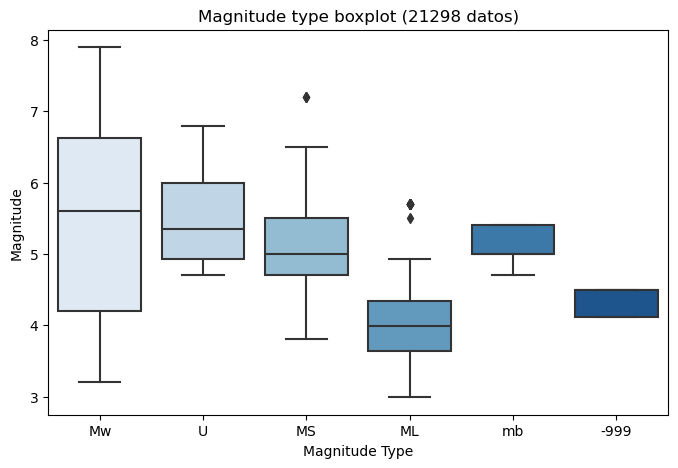

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Magnitude Type", y="Magnitude", data=df,  palette='Blues')
plt.title("Magnitude type boxplot (21298 datos)")
plt.xlabel("Magnitude Type")
plt.ylabel("Magnitude")
plt.show()

Es de vital importancia filtrar inicialmente por tipo de magnitud grabada en el dataset para así tener una uniformidad y en la escala de medición. La escala de Magnitud de momentos (Mw) es la más confiable ya que esta depende de la frecuencia de las ondas del sismo. Por otra parte, se asume que U es Unknown, y -999 donde no hay información. ML (Magnitud local) hace referencia a la escala de Richter la cual es basada en la amplitud máxima de ondas registradas en un sismógrafo de periodo corto a aproximadamente 100 km del epicentro. mb representa la magnitud de ondas de cuerpo, “body waves”, y es calculada a partir de las ondas P (primarias). Por último la magnitud de ondas superficiales, “surface waves”, calculada a partir de ondas Rayleigh, un tipo de onda superficial. <br>
Cada escala tiene una limitación distinta, entre aquellas limitaciones, la de Richter se satura en grandes eventos, al igual que las de body waves y las de 
surface waves.

Se opta por mantener solamente aquellos registros grabados con la escala de magnitud de momentos ya que a pesar de que las demás escalas puedan ser fiables a ciertos valores de magnitud los cuales si están incluidos en sus distribuciones, es mejor evitar usarlos ya que por un lado, no se sabe de que manera fueron hechas estas mediciones con exactitud, por lo que posiblemente se estaría complementando con ruido

In [5]:
df = df[df['Magnitude Type'] == 'Mw']

In [6]:
df.drop(columns=['Record Sequence Number','Earthquake Name',
                'Magnitude Type','EpiD (km)','Joyner-Boore Dist. (km)',
                'RmsD (km)','Rx','Vs30 (m/s) selected for analysis',
                'Tmax', 'Lowest Usable Freq - Ave. Component (Hz)',
                'PGA (g)','PGV (cm/sec)','PGD (cm)'], inplace=True)

In [7]:
df

Hypocenter Latitude (deg)  Hypocenter Longitude (deg)  \
0                       46.61000                  -111.96000   
2                       40.40000                  -125.10000   
4                       40.30000                  -124.80000   
5                       32.76010                  -115.41620   
10                      40.28300                  -124.80000   
...                          ...                         ...   
21293                   37.86037                  -122.23589   
21294                   37.86037                  -122.23589   
21295                   37.86037                  -122.23589   
21296                   37.86037                  -122.23589   
21297                   35.81700                  -120.36500   

       Station Latitude  Station Longitude  Hypocenter Depth (km)  Magnitude  \
0              46.58000          -112.0300                  6.000       6.00   
2              40.57600          -124.2630                 10.000       5.80   
4              40.57600          -124.2630                 10.000       5.50   
5              32.79400          -115.5490                  8.800       6.95   
10             40.57600          -124.2630                 10.000       5.80   
...                 ...                ...                    ...        ...   
21293          37.58230          -122.4201                  8.465       3.60   
21294          37.40370          -122.1760                  8.465       3.60   
21295          37.58640          -122.5022                  8.465       3.60   
21296          37.94910          -122.4085                  8.465       3.60   
21297          35.21263          -120.8553                  8.100       6.00   

       Rhypo_OpenQuake  Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  \
0              8.71000            2.86           3       0.161934  ...   
2             74.17000           71.57           4       0.040997  ...   
4             55.78000           53.58           4       0.122486  ...   
5             15.69000            6.09           4       0.234619  ...   
10            56.85000           53.77           4       0.107289  ...   
...                ...             ...         ...            ...  ...   
21293         35.89050           35.63           2       0.005176  ...   
21294         51.66153           51.36           3       0.000505  ...   
21295         39.34073           39.13           3       0.003058  ...   
21296         19.97517           19.44           2       0.001620  ...   
21297         81.00000           78.32           3       0.010478  ...   

       T_0.5_RotD50  T_0.75_RotD50  T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  \
0          0.143020       0.092829      0.101136      0.059109      0.035895   
2          0.082295       0.056946      0.035785      0.016157      0.009347   
4          0.223093       0.091499      0.093659      0.026785      0.013654   
5          0.629952       0.435350      0.351286      0.197357      0.215745   
10         0.172930       0.124190      0.085661      0.040947      0.019499   
...             ...            ...           ...           ...           ...   
21293      0.001476       0.000493      0.000260      0.000114           NaN   
21294      0.000350       0.000166      0.000093      0.000043      0.000016   
21295      0.000883       0.000366      0.000123      0.000052      0.000032   
21296      0.000810       0.000282      0.000159      0.000067      0.000032   
21297      0.030253       0.017435      0.009625      0.005255      0.003526   

       T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  
0          0.015257      0.007987      0.004644      0.003037            NaN  
2          0.002960           NaN           NaN           NaN            NaN  
4               NaN           NaN           NaN           NaN            NaN  
5          0.106360      0.046965           NaN           NaN            NaN  
10              NaN           Na

In [8]:
inputs  = df.columns[0:9]
outputs = df.columns[9:31]

In [9]:
outputs

Index(['T_0.01_RotD50', 'T_0.02_RotD50', 'T_0.03_RotD50', 'T_0.04_RotD50',
       'T_0.05_RotD50', 'T_0.075_RotD50', 'T_0.1_RotD50', 'T_0.15_RotD50',
       'T_0.2_RotD50', 'T_0.25_RotD50', 'T_0.3_RotD50', 'T_0.4_RotD50',
       'T_0.5_RotD50', 'T_0.75_RotD50', 'T_1.0_RotD50', 'T_1.5_RotD50',
       'T_2.0_RotD50', 'T_3.0_RotD50', 'T_4.0_RotD50', 'T_5.0_RotD50',
       'T_6.0_RotD50', 'T_10.0_RotD50'],
      dtype='object')

Se escogen aquellos valores de periodo para aceleraciones espectrales mas representativas de las zonas al momento de graficar.

In [10]:
inputs

Index(['Hypocenter Latitude (deg)', 'Hypocenter Longitude (deg)',
       'Station Latitude', 'Station Longitude', 'Hypocenter Depth (km)',
       'Magnitude', 'Rhypo_OpenQuake', 'Rrup_OpenQuake', 'Soil_Class'],
      dtype='object')

Se escoge analizar solo aquellas variables que serán usadas para la predicción del espectro de respuesta. <br>
La razón de escogencia de estas variables en específico rige en la comparación justa entre el comportamiento de los GMPEs (Ground Motion Prediction Equations) anteriores. Estos GMPEs usados para comparar, usan laas variables de Magnitud (Magnitude), profundidad hipocentral (Hypocenter Depth (km)) , distancia de ruptura (Rrup_OpenQuake) y clase de suelo (Soil_Class). <br>
Cabe destacar que para el caso del modelo ASK14 desarrollado por Abrahamson et al 2014, usa la variable Vs30 como alternativa a la clase de suelo. Ambas variables representan lo mismo, siendo que Vs30 es continua y la clase de suelo es una clasificación discreta del Vs30.

La variable de distancia hipocentral no será usada para predecir pero si será usada para los filtros que se harán para la preparación de los datos.

          Magnitude  Hypocenter Depth (km)  Rhypo_OpenQuake  Rrup_OpenQuake
count  12893.000000           12893.000000     12893.000000    12893.000000
mean       5.490787               9.535760       130.267442      119.121043
std        1.300414               3.883231       128.995649      113.612737
min        3.200000               0.020000         2.060000        0.050000
25%        4.200000               6.973000        49.330000       43.230000
50%        5.600000               9.000000        94.302440       86.320000
75%        6.630000              12.000000       176.600000      165.400000
max        7.900000              41.000000      1754.710000     1532.660000


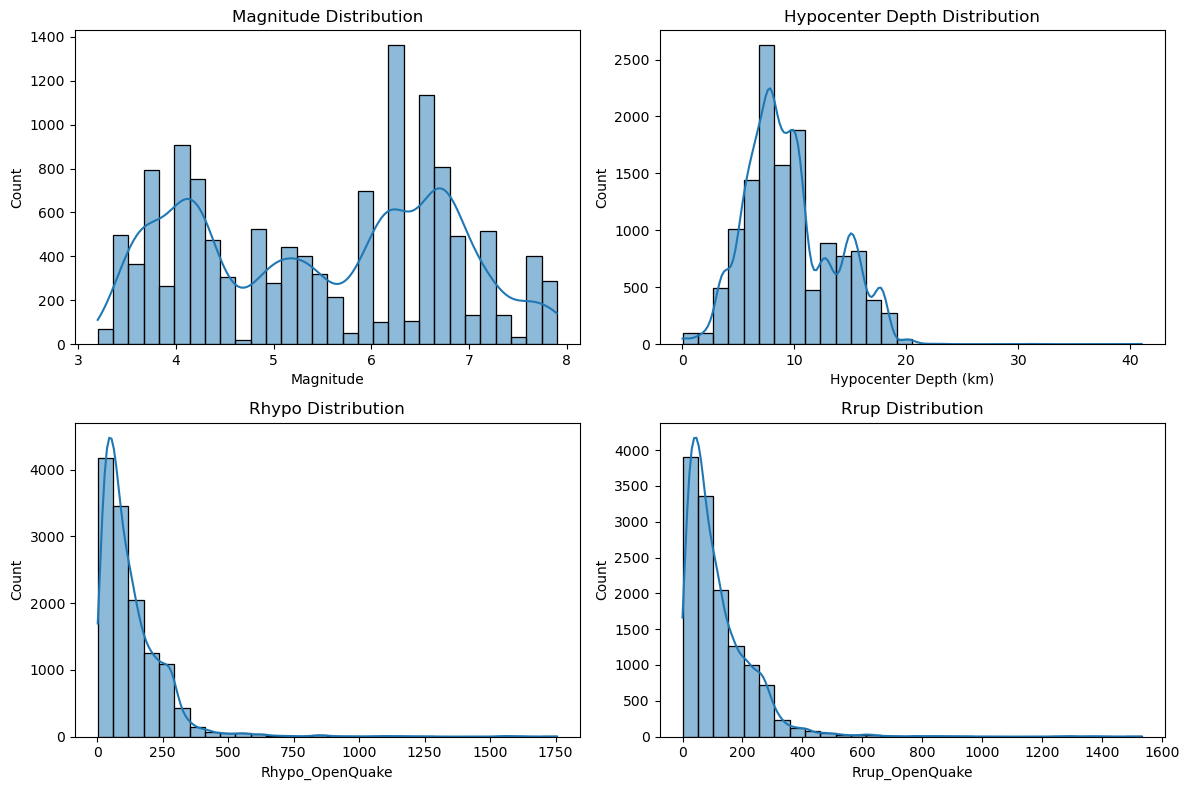

In [11]:
# Asumiendo que tu DataFrame se llama df
# 1. Descriptivos
print(df[['Magnitude', 'Hypocenter Depth (km)', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']].describe())

# 2. Histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['Magnitude'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Magnitude Distribution")

sns.histplot(df['Hypocenter Depth (km)'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Hypocenter Depth Distribution")

sns.histplot(df['Rhypo_OpenQuake'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Rhypo Distribution")

sns.histplot(df['Rrup_OpenQuake'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Rrup Distribution")


plt.tight_layout()
plt.show()

Se puede evidenciar como Las distancias tienen un comportamiento muy asimétrico hacia la derecha, lo que indica que muy probablemente la transformación logarítmica podría ayudar a mejorar la distribución de los datos. <br>
Por parte de la magnitud, se ve una gran variabilidad de valores entre 3 y un poco menos a 8.

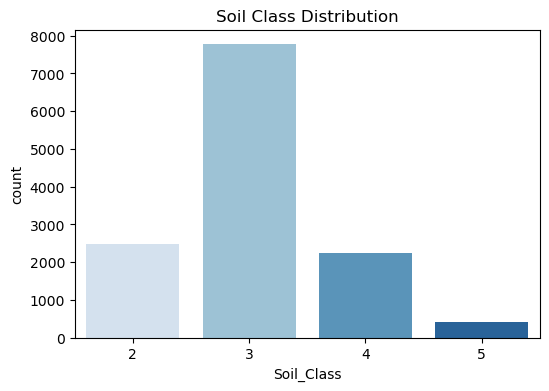

In [12]:
# 3. Soil_Class
plt.figure(figsize=(6,4))
sns.countplot(x="Soil_Class", data=df, palette='Blues')
plt.title("Soil Class Distribution")
plt.show()


Dado que la clasificación de los suelos fue hecha a partir de unos rangos de Vs30, es importante mencionar que los suelos tipo 1 (hard rock) no se pueden clasificar usando Vs30, por lo que es normal que no se tenga información sobre las clases de suelo tipo 1 para el caso del dataset de NGA West 2

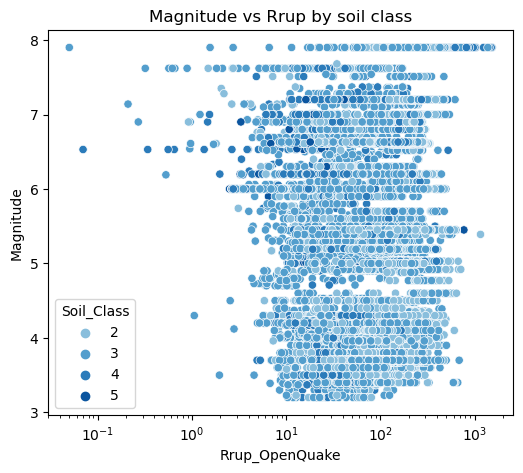

In [13]:
from matplotlib.colors import ListedColormap

# 4. Relaciones bivariadas
palette_dark_blues = sns.color_palette("Blues", n_colors=6)[2:]
plt.figure(figsize=(6,5))
sns.scatterplot(x="Rrup_OpenQuake", y="Magnitude", hue="Soil_Class", data=df,
                palette=palette_dark_blues)
plt.xscale("log")
plt.title("Magnitude vs Rrup by soil class")
plt.show()



Se puede evidenciar que el dataset de NGA WEST2 cubre gran parte de las distancias de ruptura entre los 5km y los 1000km con una variabilidad en la magnitud que a su vez se encuentra entre los valores de 3 y 8 siendo esto una buena señal ya que se tiene información sobre sismos de gran magnitud

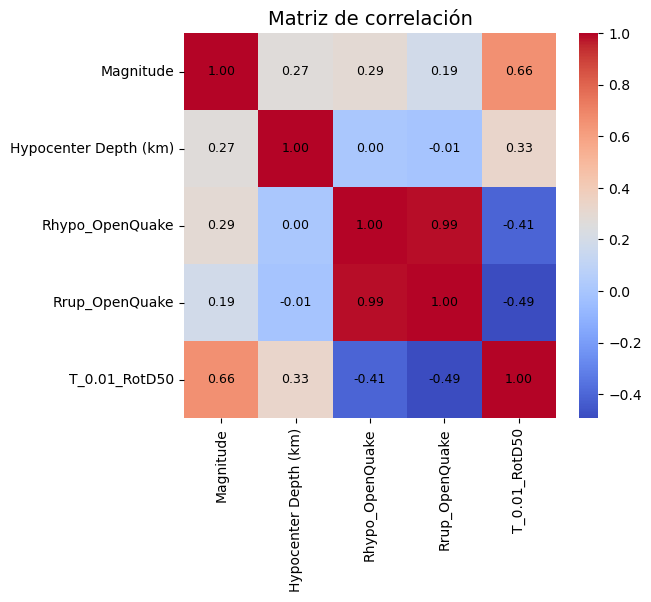

In [14]:
corr = df[['Magnitude','Hypocenter Depth (km)','Rhypo_OpenQuake','Rrup_OpenQuake','T_0.01_RotD50']].corr(method='spearman')

plt.figure(figsize=(6,5))
ax = sns.heatmap(corr, annot=False, cmap="coolwarm")

# Anotar manualmente
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j+0.5, i+0.5, f"{corr.iloc[i,j]:.2f}", 
                ha='center', va='center', color='black', fontsize=9)

plt.title("Matriz de correlación", fontsize=14)
plt.show()



Con correlaciones moderadas, es posible decir que una de las variables de respuesta, en este caso Sa a T=0.01s (Peak Ground Acceleration) podría ser explicada por el uso de estas variables. <br>
Luego de hacer el filtrado mencionado anteriormente usando la variable de Rhypo, es necesario eliminarla del conjunto de variables predictoras ya que por su gran correlación con Rrup podría conllevar a un overfitting de los modelos que se utilizarán.

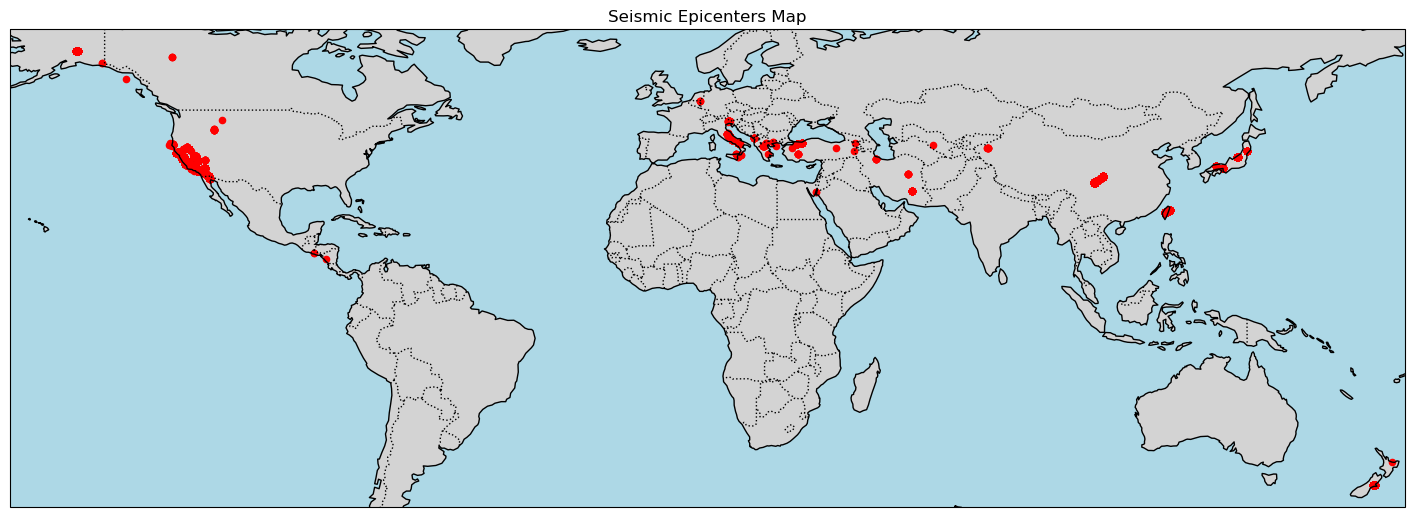

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-85, -65, -5, 15])  # límites en grados (ej: norte de Suramérica)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

plt.scatter(df["Hypocenter Longitude (deg)"], df["Hypocenter Latitude (deg)"], 
            c="red", s=20, transform=ccrs.PlateCarree())

plt.title("Seismic Epicenters Map")
plt.show()


En el mapa se puede evidenciar la ubicación de los sismos registrados y filtrados por tipo de magnitud en el dataset de NGA West2. <br>
Se puede observar que la mayoría de sismos registrados en el dataset se dieron en California, la región sur de Europa y parte de Asia. Sin embargo, en el dataset de NGA West2 no son los sismos exactamente lo que se muestran. Cada sismo puede aparecer mas de una vez en el registro ya que lo que realmente se toma es lo que la estación sismica registró.

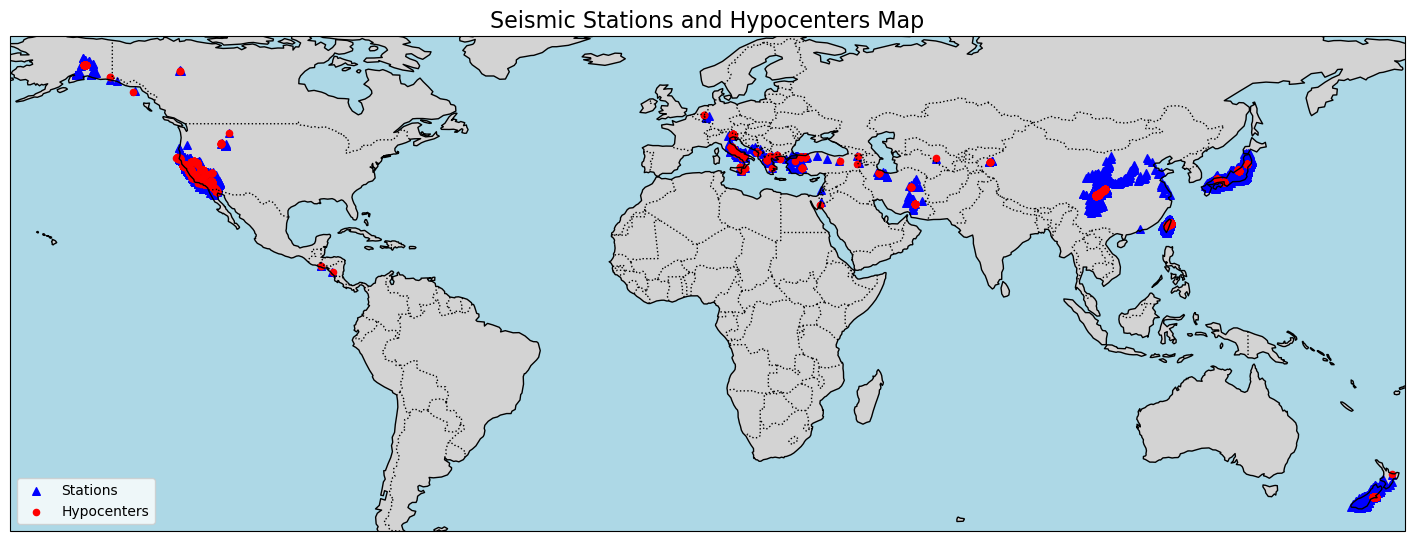

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites opcionales: norte de Suramérica
# ax.set_extent([-85, -65, -5, 15])  

# Agregar elementos del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Estaciones (ej. en azul)
plt.scatter(df["Station Longitude"], df["Station Latitude"], 
            c="blue", s=30, marker="^", 
            label="Stations", transform=ccrs.PlateCarree())

# Hipocentros (ej. en rojo)
plt.scatter(df["Hypocenter Longitude (deg)"], df["Hypocenter Latitude (deg)"], 
            c="red", s=20, marker="o", 
            label="Hypocenters", transform=ccrs.PlateCarree())

# Título y leyenda
plt.title("Seismic Stations and Hypocenters Map", fontsize=16)
plt.legend(loc="lower left")

plt.show()


En este nuevo mapa ya se puede visualizar el contraste entre las estaciones que aparecen en los registros y los sismos registrados

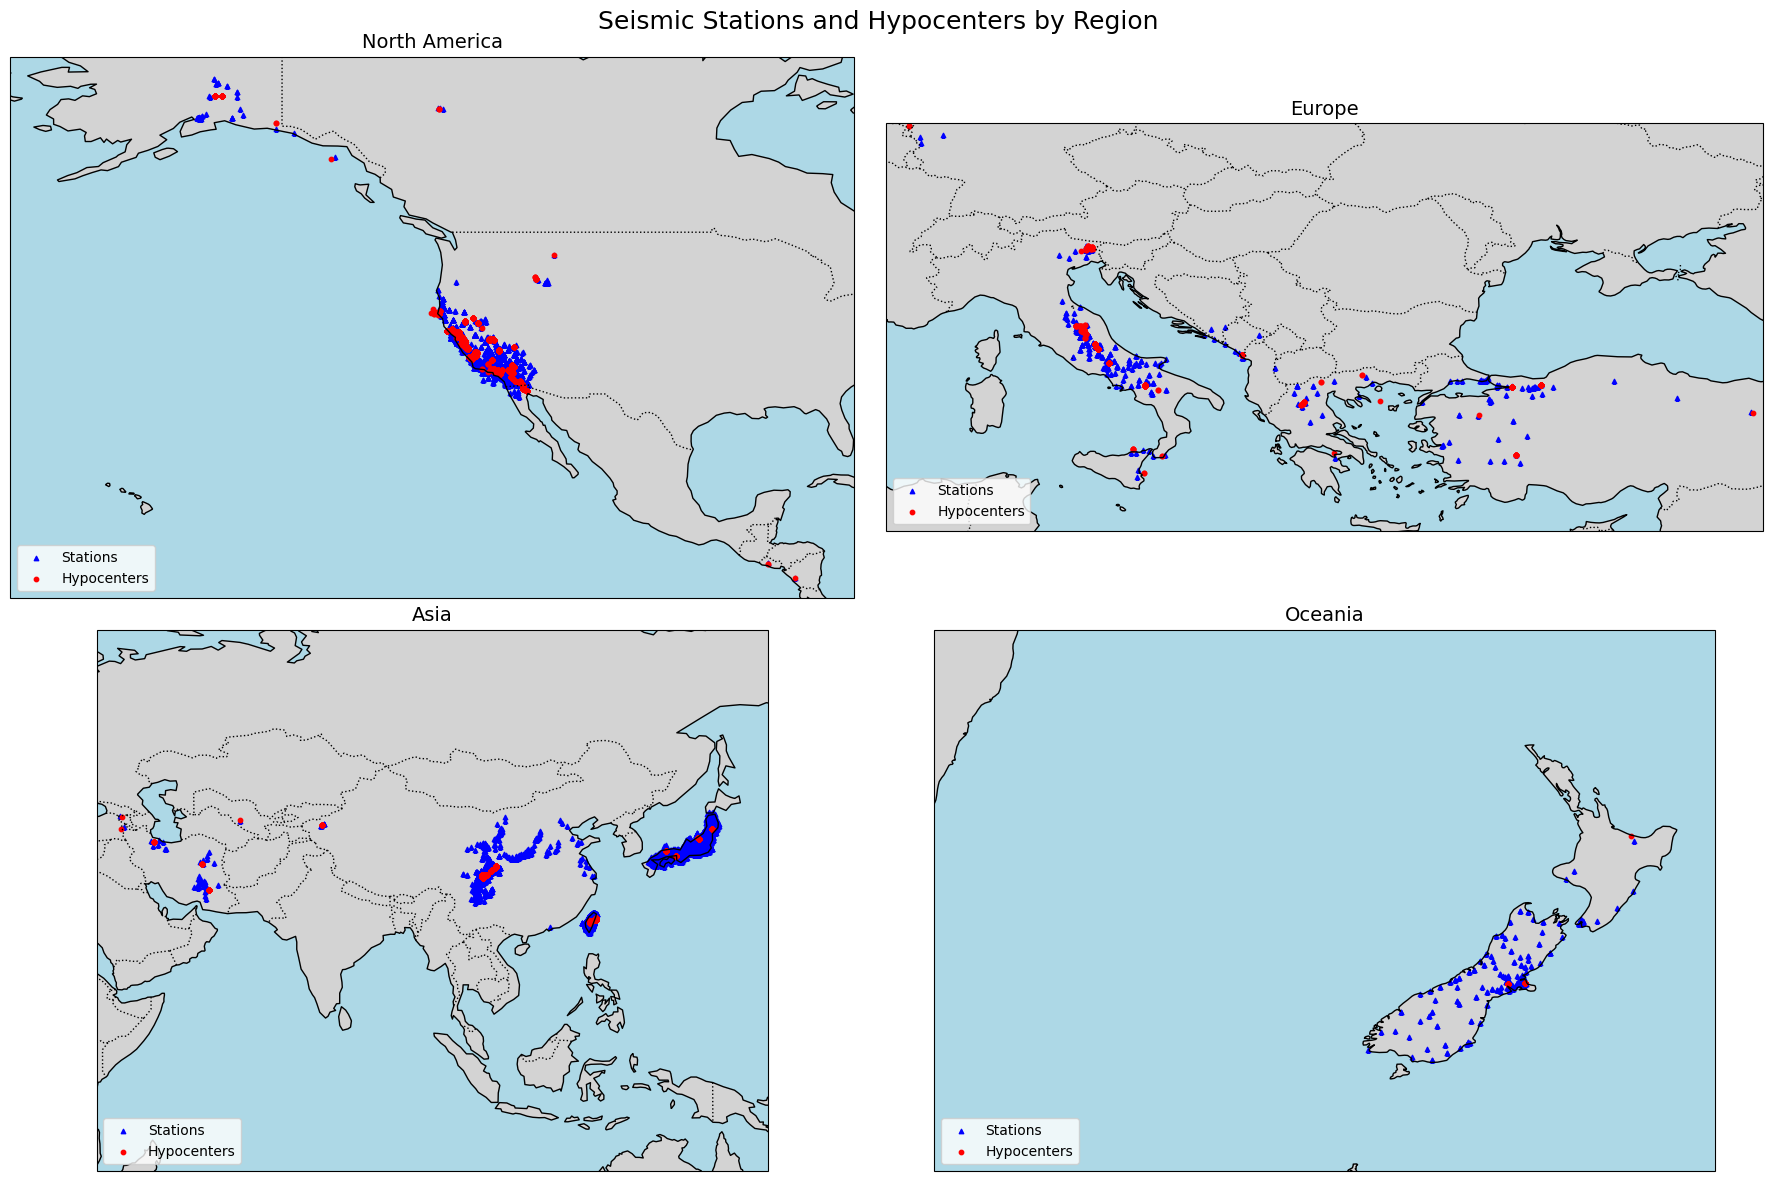

In [17]:
# Definir regiones (xmin, xmax, ymin, ymax)
regions = {
    "North America": [-170, -80, 10, 60],
    "Europe": [5, 40, 35, 50],
    "Asia": [40, 150, -10, 60],
    "Oceania": [150, 180, -50, -30]
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (region, extent) in enumerate(regions.items()):
    ax = axes[i]
    ax.set_extent(extent)

    # Agregar elementos del mapa
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

    # Estaciones
    ax.scatter(df["Station Longitude"], df["Station Latitude"], 
               c="blue", s=10, marker="^", 
               label="Stations", transform=ccrs.PlateCarree())

    # Hipocentros
    ax.scatter(df["Hypocenter Longitude (deg)"], df["Hypocenter Latitude (deg)"], 
               c="red", s=10, marker="o", 
               label="Hypocenters", transform=ccrs.PlateCarree())

    ax.set_title(region, fontsize=14)
    ax.legend(loc="lower left")

plt.suptitle("Seismic Stations and Hypocenters by Region", fontsize=18)
plt.tight_layout()
plt.show()


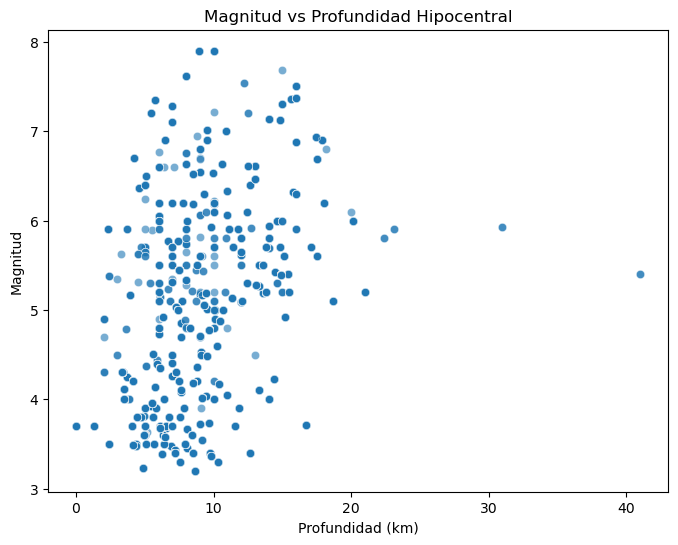

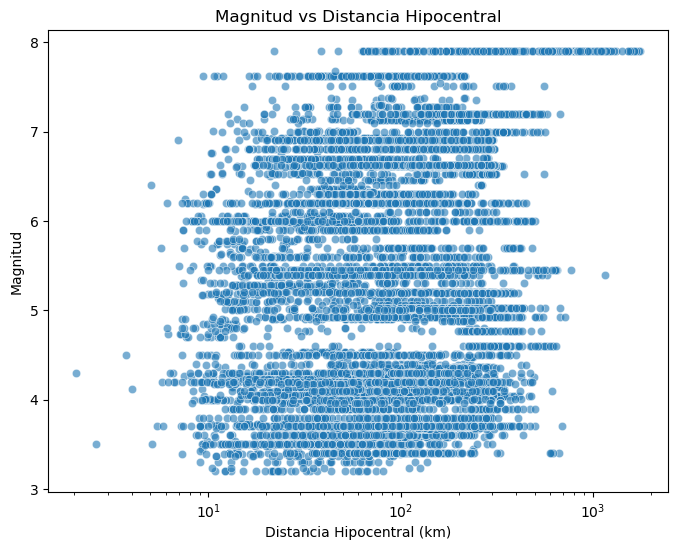

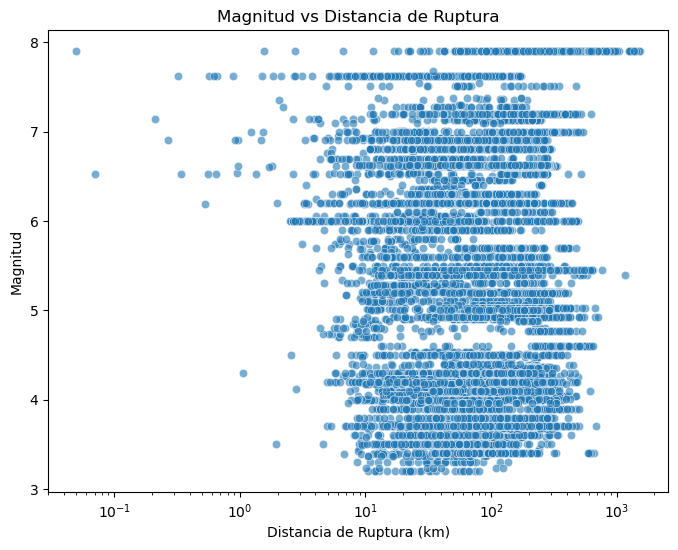

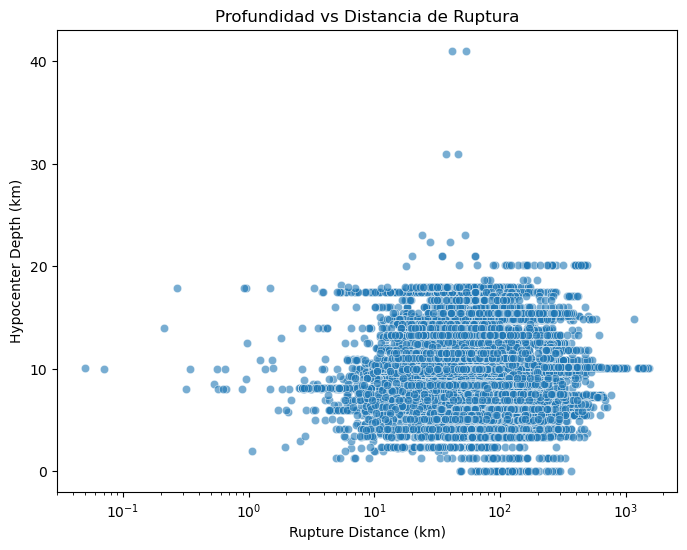

In [18]:
# 1. Magnitud vs Profundidad
plt.figure(figsize=(8,6))
sns.scatterplot(x="Hypocenter Depth (km)", y="Magnitude", data=df, alpha=0.6)
plt.title("Magnitud vs Profundidad Hipocentral")
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud")
plt.show()

# 2. Magnitud vs Distancia hipocentral
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rhypo_OpenQuake", y="Magnitude", data=df, alpha=0.6)
plt.title("Magnitud vs Distancia Hipocentral")
plt.xlabel("Distancia Hipocentral (km)")
plt.ylabel("Magnitud")
plt.xscale("log")
plt.show()

# 3. Magnitud vs Distancia de ruptura
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rrup_OpenQuake", y="Magnitude", data=df, alpha=0.6)
plt.title("Magnitud vs Distancia de Ruptura")
plt.xlabel("Distancia de Ruptura (km)")
plt.ylabel("Magnitud")
plt.xscale("log")
plt.show()

# 4. Profundidad vs Distancia de ruptura
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rrup_OpenQuake", y="Hypocenter Depth (km)", data=df, alpha=0.6)
plt.title("Profundidad vs Distancia de Ruptura")
plt.xscale("log")
plt.xlabel("Rupture Distance (km)")
plt.ylabel("Hypocenter Depth (km)")
plt.show()

De estas cuatro gráficas, principalmente se extrae que en términos de profundidad, los registros sismicos del NGA West 2 están entre los 0 y los 25km con cierto registro atípico acercándose a los 30 o 40km. <br>
Las variables de distancias (hipocentral y ruptura) se comportan de manera similar contra la magnitud como era de esperarse. Siendo que la distancia hipocentral está un poco mas dispersa


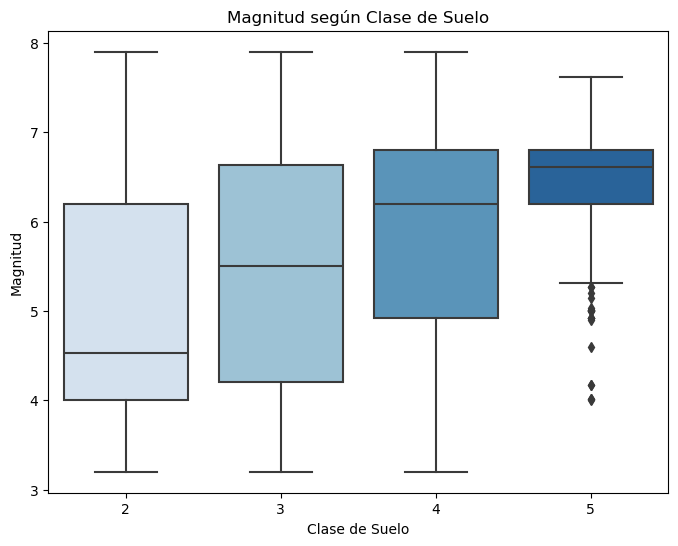

In [19]:
# 5. Magnitud vs Clase de suelo
plt.figure(figsize=(8,6))
sns.boxplot(x="Soil_Class", y="Magnitude", data=df, palette='Blues')
plt.title("Magnitud según Clase de Suelo")
plt.xlabel("Clase de Suelo")
plt.ylabel("Magnitud")
plt.show()

Se puede observar que a medida que la clase de suelo aumenta, la mediana se mueve junto con los rangos intercuartilicos para cubrir mayores valores de magnitud. <br>
Para la clase de suelo 2, la el 50% de los valores se encuentra entre valores de magnitudes de 4 a 6.3 aproximadamente, y el 25% está entre 6.3 y 7.9. <br>
Por otra parte, para la clase de suelo tipo 3, la diferencia que resalta con la clase de suelo tipo 2 es el valor de la mediana el cual se encuentra aproximadamente en 5.5, dando a entender que el 50% de los valores está entre 5.5 y 7.8.<br>
Para las clases de suelo de suelo tipo 4 y 5 comparten en particular el cuartil 3 equivalente al 75%, con lo que se concluye que el 25% de los valores para ambas clases está por encima de 6.7 aproximadamente.<br>
En particular la clase 5 posee una mediana muy cercana al cuartil 3 dando a entender que el 25% de los datos se encuentra acumulado en la pequeña franja aproximada de magnitudes 6.5 y 6.7. Asimismo es importante mencionar la presencia de datos atípicos para la clase de suelo 5. Muy pocos registros por debajo de magnitudes 5.3 aproximadamente

### Relaciones con la variable de respuesta

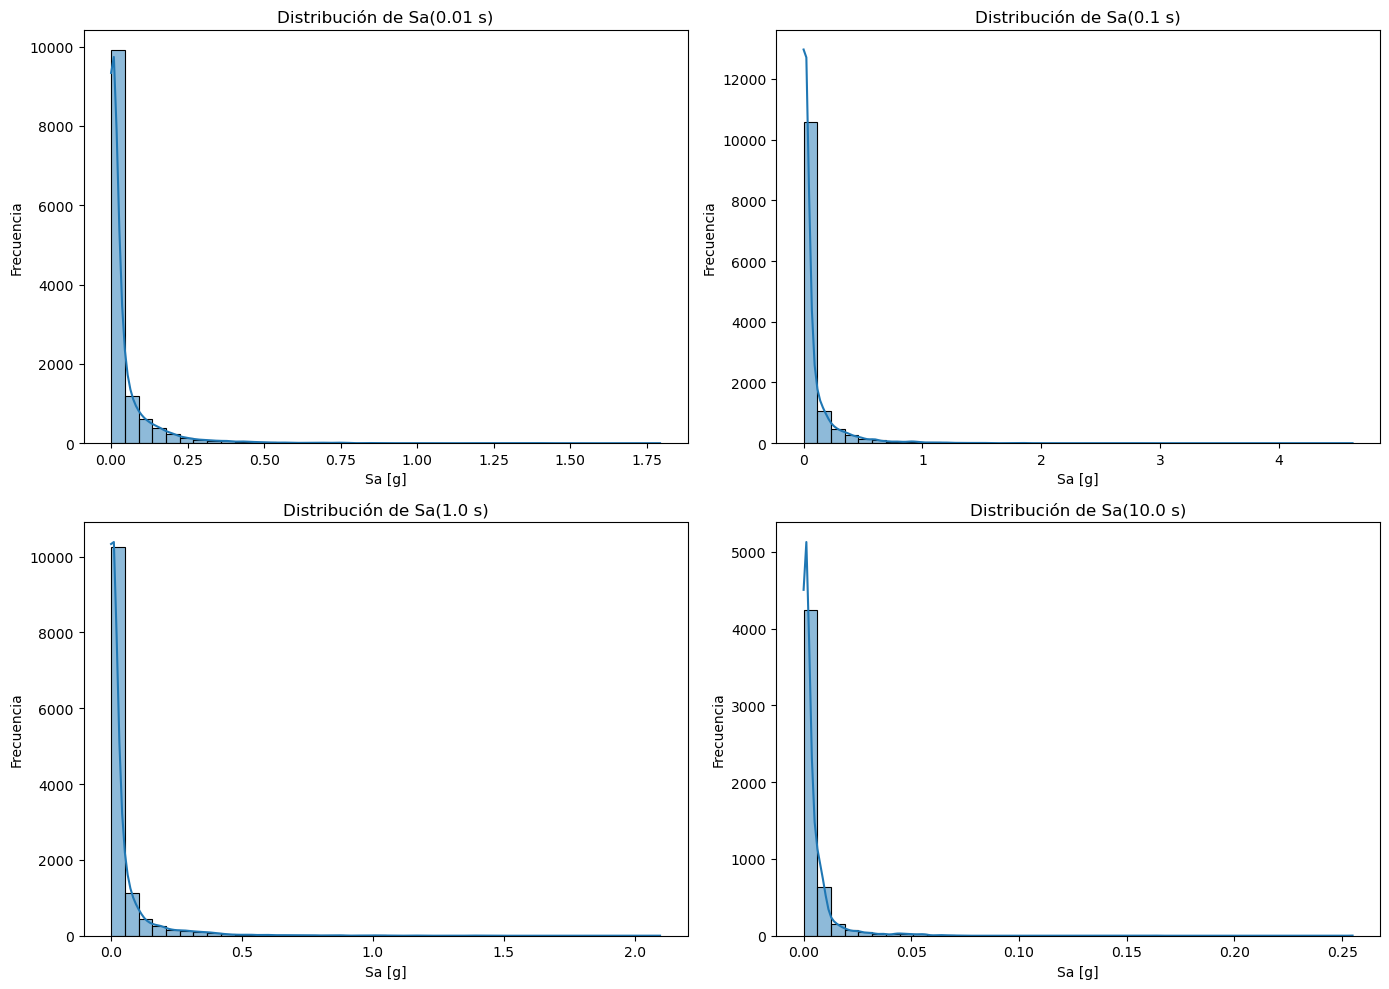

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

periodos_ref = ["T_0.01_RotD50", "T_0.1_RotD50", "T_1.0_RotD50", "T_10.0_RotD50"]

# --- 1. Distribución de Sa(T) ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.histplot(df[col], bins=40, kde=True, ax=ax)
    ax.set_title(f"Distribución de Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Sa [g]")
    ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()




Se escogen los periodos que puedan ser mas representativos del conjunto completo. En este caso de manera general se puede evidenciar una asimetría muy notoria hacia la derecha. Esto indica que antes de entrenar los modelos, así como hay que convertir las distancias de ruptura a logaritmo, la aceleración espectral también debe convertirse a logaritmo para suavizar su distribución

La variable de respuesta Sa es medida usando la dimensión g, que representa el porcentaje de aceleración de aceleración con respecto a la aceleración de la gravedad. Es por ello que un valor de 0.1g significa que es el 10% de la aceleración gravitacional, es decir 0.1 * 9.81 m/s^2 o 0.1 *981 cm/s^2

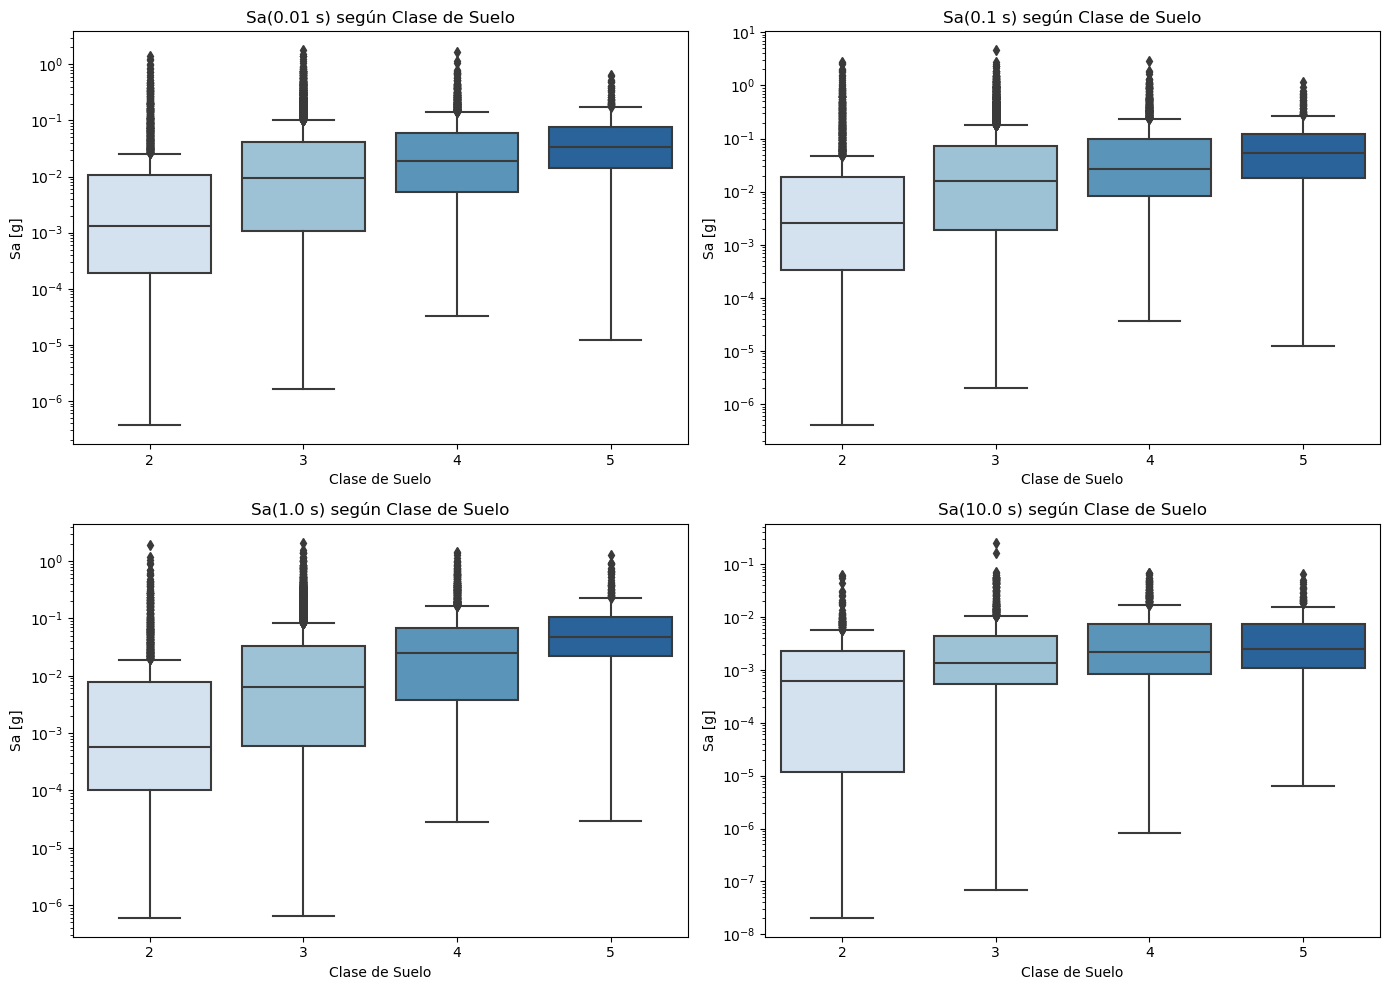

In [21]:
# --- 2. Boxplots por clase de suelo ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.boxplot(x="Soil_Class", y=col, data=df, ax=ax , palette='Blues')
    ax.set_yscale("log")
    ax.set_title(f"Sa({col.split('_')[1]} s) según Clase de Suelo")
    ax.set_xlabel("Clase de Suelo")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

Las clases de suelo comparadas por valores de aceleración espectral nos confirma lo esperado inicialmente. En suelos menos densos el nivel de amenaza de un sismo con respecto a un sitio es mayor al resto. Una de las tantas conclusiones que se pueden sacar observando el comportamiento de los suelos 4 y 5 los cuales mantienen los rangos intercuartilicos y las medianas por encima de los otros dos tipos de suelo. <br>


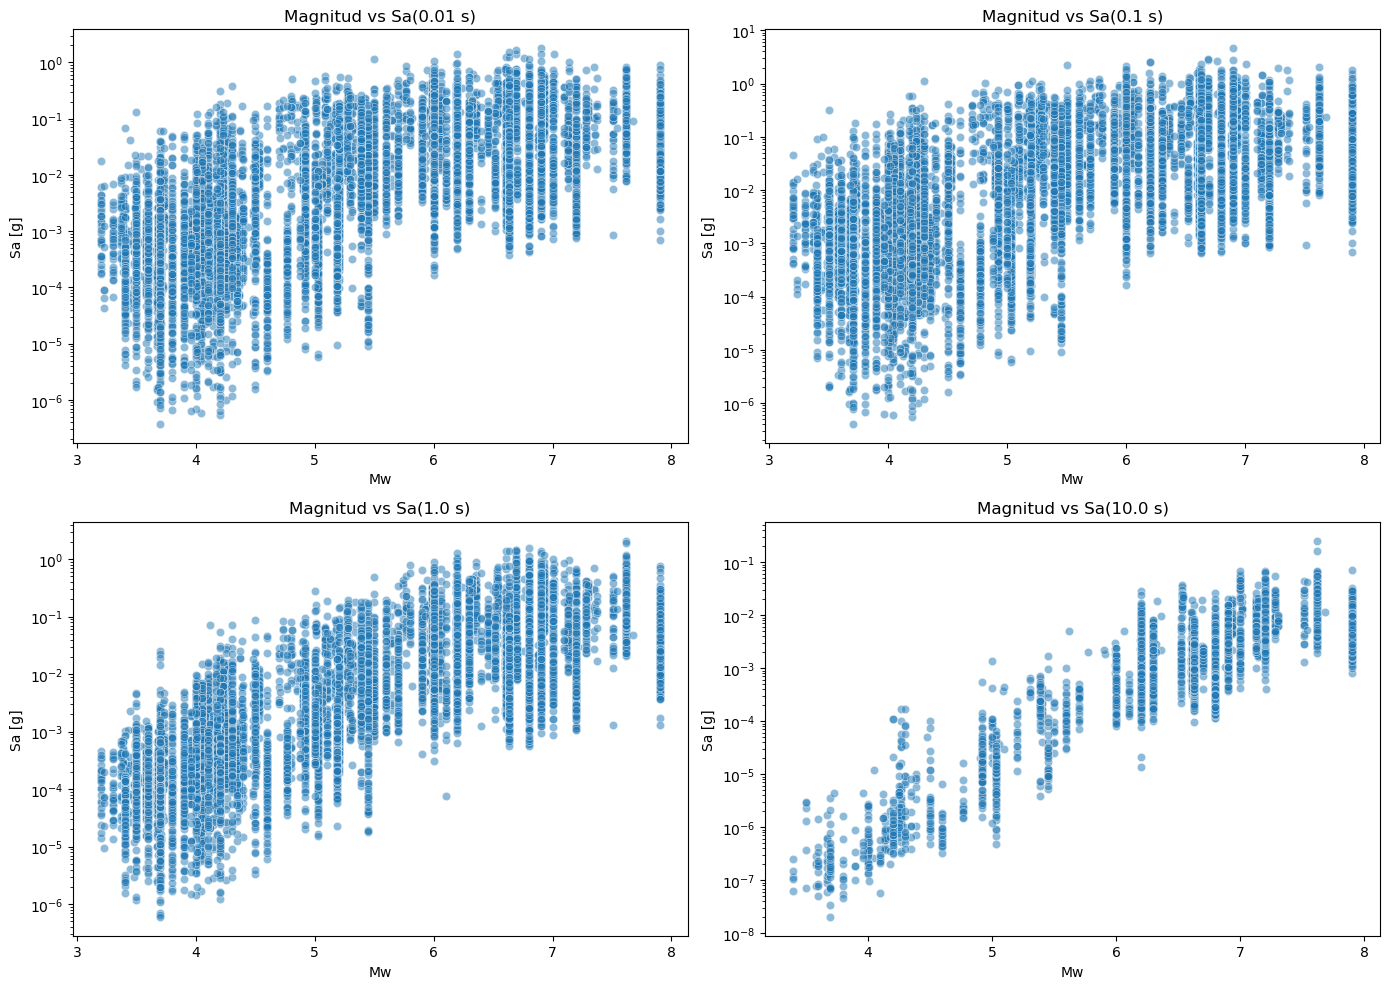

In [22]:
# --- 3. Sa(T) vs Magnitud ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.scatterplot(x="Magnitude", y=col, data=df, alpha=0.5, ax=ax)
    ax.set_yscale("log")
    ax.set_title(f"Magnitud vs Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Mw")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

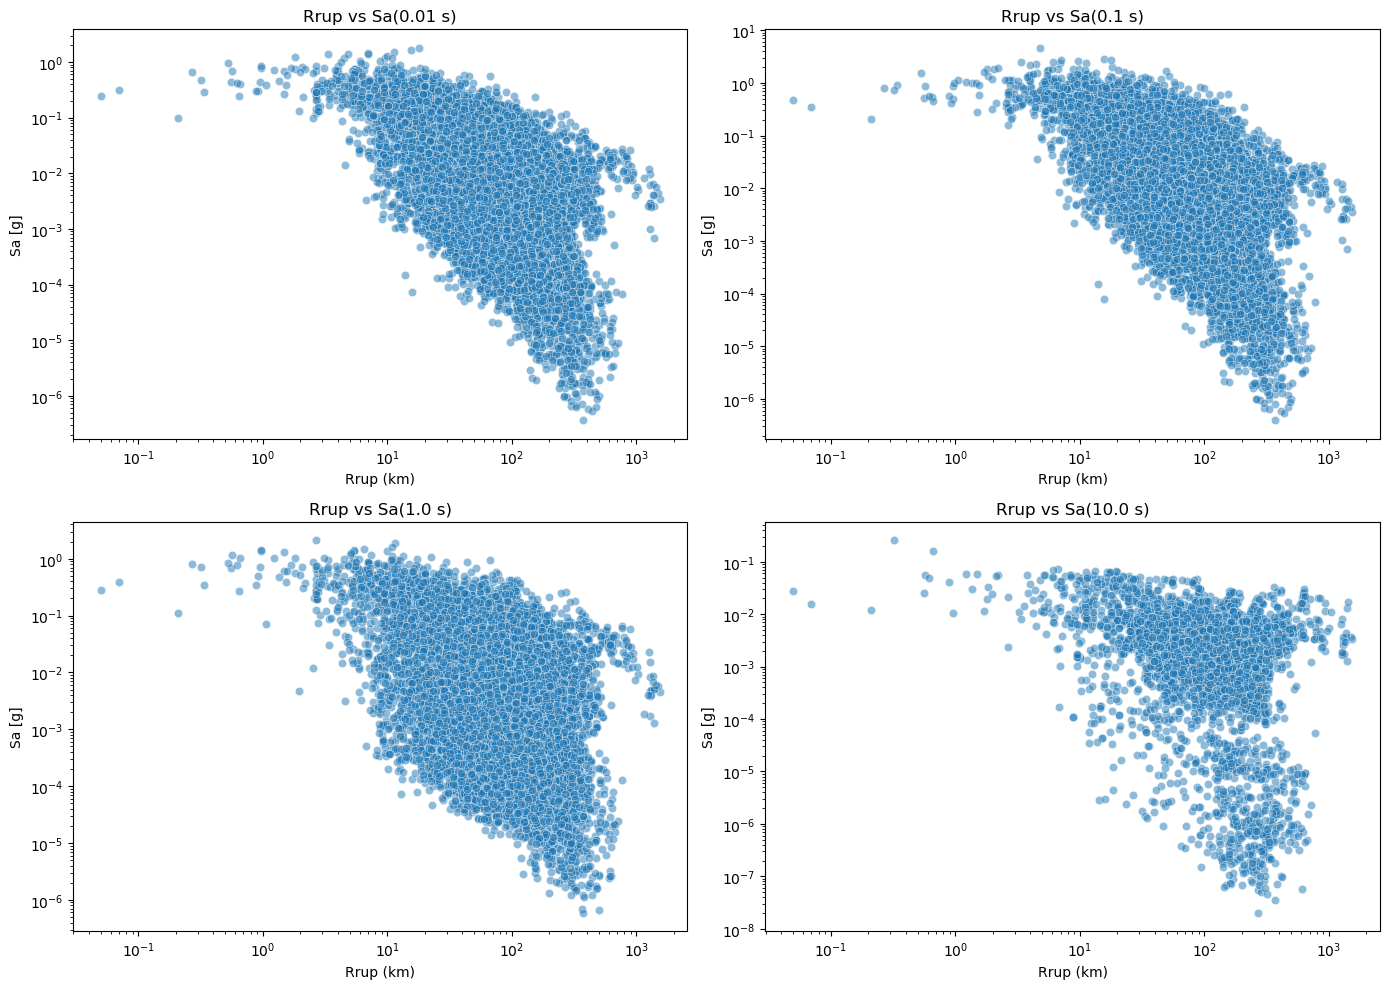

In [23]:
# --- 4. Sa(T) vs Distancia (Rrup) ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.scatterplot(x="Rrup_OpenQuake", y=col, data=df, alpha=0.5, ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"Rrup vs Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Rrup (km)")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

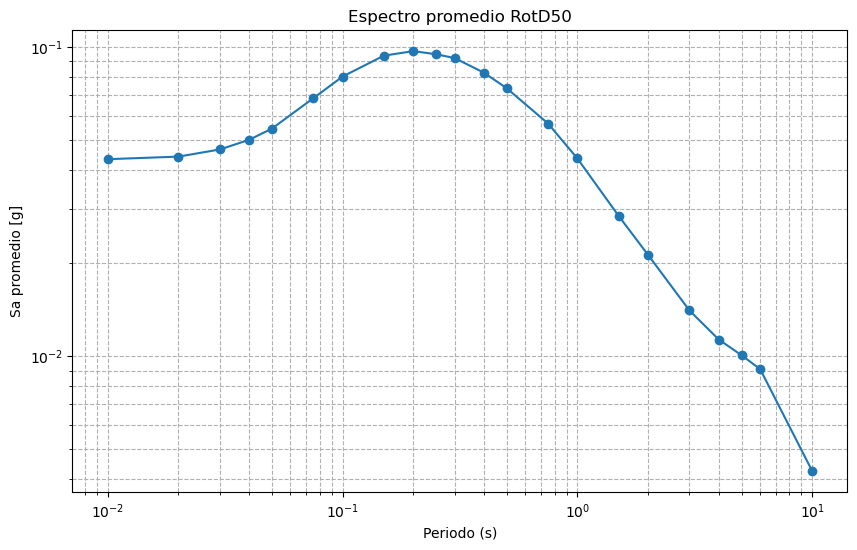

In [24]:

cols_spectra = df.filter(like="RotD50").columns
T = [float(c.split("_")[1]) for c in cols_spectra]
Sa_mean = df[cols_spectra].mean()

plt.figure(figsize=(10,6))
plt.plot(T, Sa_mean, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Periodo (s)")
plt.ylabel("Sa promedio [g]")
plt.title("Espectro promedio RotD50")
plt.grid(True, which="both", ls="--")
plt.show()


## EDA Colombia

In [25]:
df_Col = pd.read_excel('C:/Users/elias/OneDrive/Desktop/MachineLearning/FinalProjectDL/Final_Project/CopiaDataBaseSGC.xlsx')
df_Col

Record Sequence Number               EQID  \
0                         76  CO_19940913100134   
1                         79  CO_19961104172500   
2                         89  CO_19961104172500   
3                         93  CO_20070424085334   
4                         95  CO_20080524192044   
...                      ...                ...   
8806                    6438  CO_20190616161836   
8807                    7490  CO_20180108125827   
8808                    8434  CO_20190616161836   
8809                    1340  CO_20150221222646   
8810                    1530  CO_20050421033924   

      Epicenter Latitude (deg; positive N)  \
0                                    7.105   
1                                    7.364   
2                                    7.364   
3                                    5.621   
4                                    4.374   
...                                    ...   
8806                                 6.820   
8807                                 6.790   
8808                                 6.820   
8809                                 4.670   
8810                                 4.985   

      Epicenter Longitude (deg; positive E)  Hypocenter Depth (km)  Magnitude  \
0                                   -76.665                   14.0     6.0202   
1                                   -77.380                   14.0     6.2562   
2                                   -77.380                   14.0     6.2562   
3                                   -75.895                   50.6     5.1307   
4                                   -73.708                   14.7     5.8671   
...                                     ...                    ...        ...   
8806                                -73.150                  143.0     4.6000   
8807                                -72.980                  153.4     4.9912   
8808                                -73.150                  143.0     4.6000   
8809                                -76.180                   95.0     5.1699   
8810                                -76.263                  101.9     5.2333   

     Magnitude type  \
0                Mw   
1                Mw   
2                Mw   
3                Mw   
4                Mw   
...             ...   
8806             Mw   
8807             Mw   
8808             Mw   
8809             Mw   
8810             Mw   

     Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)  \
0                                               Crustal                                         
1                                               Crustal                                         
2                                               Crustal                                         
3                                               Crustal                                         
4                                               Crustal                                         
...                                                 ...                                         
8806                                               Deep                                         
8807                                               Deep                                         
8808                                               Deep                                         
8809                                             Inslab                                         
8810                                             Inslab                                         

      Nodal Plane 1 Strike (deg)  Nodal Plane 1 Dip (deg)  ...  T_2.5_RotD50  \
0                              4                       64  ...           NaN   
1                            188                       43  ...           NaN   
2                            188                       43  ...           NaN   
3                            154                       23  ...           NaN   
4                        

In [26]:
df_Col[outputs]=df_Col[outputs]/980

In [27]:
columnas_a_eliminar = [
    "Record Sequence Number", "Station ID", "Station Code", "Magnitude type", "EQID", "Valor_T1.5",
    "Tmax", 
    #"Epicenter Latitude (deg; positive N)", "Epicenter Longitude (deg; positive E)",
    #"Station Latitude (deg positive N)", "Station Longitude (deg positive E)",
    "Topografía", "Geología",
    "Nodal Plane 1 Rake Angle (deg)", "Nodal Plane 2 Rake Angle (deg)",
    "Nodal Plane 2 Dip (deg)", "Nodal Plane 2 Strike (deg)",
    "Rx_OpenQuake", "Ry0_OpenQuake", "Rjb_OpenQuake",
    "Repi_OpenQuake",
    # "Rhypo_OpenQuake",
    "Station Elevation (m)",
    #"Soil_Class",
    "Nodal Plane 1 Strike (deg)", "Nodal Plane 1 Dip (deg)",
    "Fault Plane (1; 2; X)", "Style-of-Faulting (S; R; N; U)",
    "Tn",
    'Record Sequence Number','EQID','Magnitude type',
    'Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)'
]


In [28]:
df_Col = df_Col[df_Col['Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)']=='Crustal']

In [29]:
df_Col.drop(columns=columnas_a_eliminar, inplace=True)

In [30]:
df_Col

Epicenter Latitude (deg; positive N)  \
0                                    7.105   
1                                    7.364   
2                                    7.364   
3                                    5.621   
4                                    4.374   
...                                    ...   
8798                                 3.440   
8799                                 3.430   
8800                                 3.410   
8801                                 7.270   
8802                                13.160   

      Epicenter Longitude (deg; positive E)  Hypocenter Depth (km)  Magnitude  \
0                                   -76.665                   14.0     6.0202   
1                                   -77.380                   14.0     6.2562   
2                                   -77.380                   14.0     6.2562   
3                                   -75.895                   50.6     5.1307   
4                                   -73.708                   14.7     5.8671   
...                                     ...                    ...        ...   
8798                                -74.190                   10.0     4.1000   
8799                                -74.200                   18.0     4.0000   
8800                                -74.170                   15.0     4.3000   
8801                                -78.640                    4.0     5.1000   
8802                                -81.050                   10.0     5.6321   

      Station Latitude (deg positive N)  Station Longitude (deg positive E)  \
0                                5.6630                            -75.8970   
1                                5.6630                            -75.8970   
2                                5.2614                            -75.8125   
3                                5.2614                            -75.8125   
4                                5.2614                            -75.8125   
...                                 ...                                 ...   
8798                             1.1890                            -77.3220   
8799                             1.1890                            -77.3220   
8800                             1.2097                            -77.2563   
8801                             1.2097                            -77.2563   
8802                             3.3721                            -76.5300   

      Soil_Class  Rrup_OpenQuake  Rhypo_OpenQuake  T_0.01_RotD50  ...  \
0              1      174.684394       181.353681       0.004946  ...   
1              1      244.405678       254.752031       0.001851  ...   
2              2      284.525886       295.168858       0.001642  ...   
3              2       65.201764        67.842661       0.113558  ...   
4              2      247.402211       254.069428       0.000849  ...   
...          ...             ...              ...            ...  ...   
8798           5      428.091130       428.905798       0.000004  ...   
8799           5      426.956629       427.631871       0.000005  ...   
8800           5      420.098899       421.640421       0.000009  ...   
8801           5      689.662530       691.759807       0.000015  ...   
8802           5     1188.735771      1196.423818       0.000139  ...   

      T_2.5_RotD50  T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  T_6.0_RotD50  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
8798      0.001570  1.087456e-06  6.427327e-07  3.359714e-07  2.371388e-07   
8799      0.001319  9.019724e-

         Magnitude  Hypocenter Depth (km)  Rhypo_OpenQuake  Rrup_OpenQuake
count  4625.000000            4625.000000      4625.000000     4625.000000
mean      4.888967              14.855676       603.941994      600.933626
std       0.538996              11.010251       391.493761      390.569914
min       3.800000               1.000000        15.963300       12.535892
25%       4.410000              10.000000       272.109203      269.646771
50%       4.861200              10.000000       521.087881      519.074539
75%       5.106300              17.000000       858.798572      856.204208
max       6.994800              58.700000      1729.619610     1719.484836


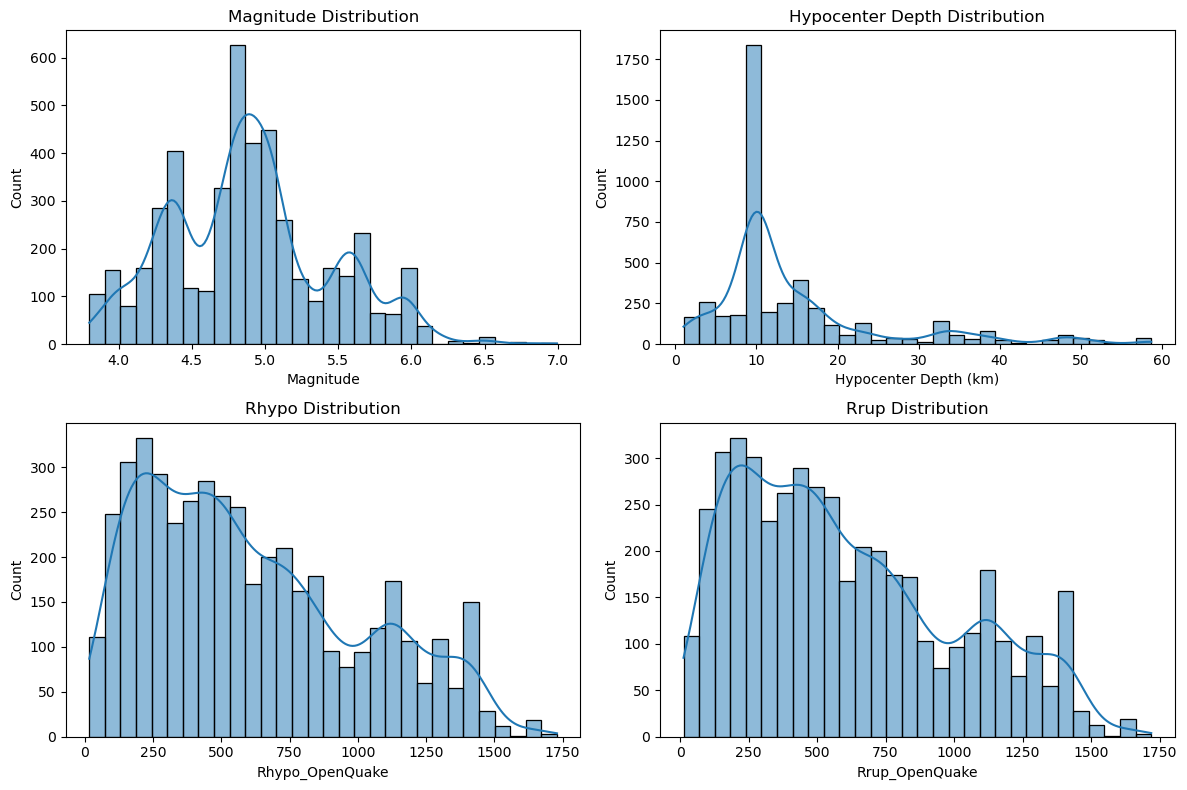

In [31]:
# 1. Descriptivos
print(df_Col[['Magnitude', 'Hypocenter Depth (km)', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']].describe())

# 2. Histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_Col['Magnitude'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Magnitude Distribution")

sns.histplot(df_Col['Hypocenter Depth (km)'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Hypocenter Depth Distribution")

sns.histplot(df_Col['Rhypo_OpenQuake'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Rhypo Distribution")

sns.histplot(df_Col['Rrup_OpenQuake'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Rrup Distribution")


plt.tight_layout()
plt.show()



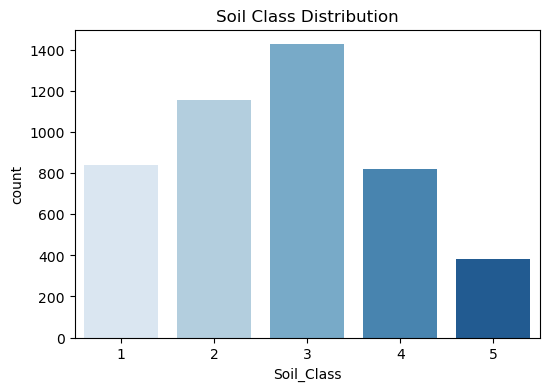

In [32]:
# 3. Soil_Class
plt.figure(figsize=(6,4))
sns.countplot(x="Soil_Class", data=df_Col, palette='Blues')
plt.title("Soil Class Distribution")
plt.show()

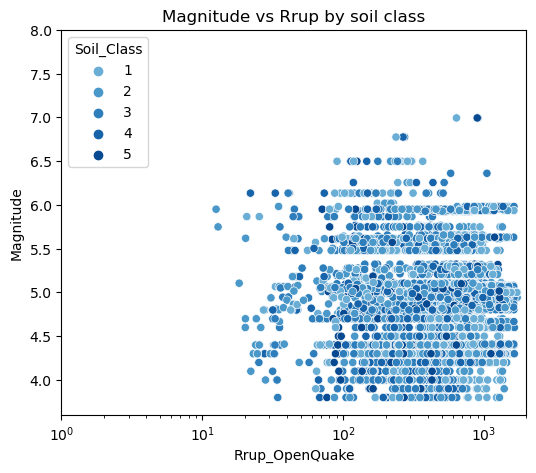

In [33]:
# 4. Relaciones bivariadas
palette_dark_blues = sns.color_palette("Blues", n_colors=9)[4:]
plt.figure(figsize=(6,5))
sns.scatterplot(x="Rrup_OpenQuake", y="Magnitude", hue="Soil_Class", data=df_Col,
                palette=palette_dark_blues)
plt.ylim(3.6, 8)
plt.xlim(1, 2000)
plt.xscale("log")
plt.title("Magnitude vs Rrup by soil class")
plt.show()

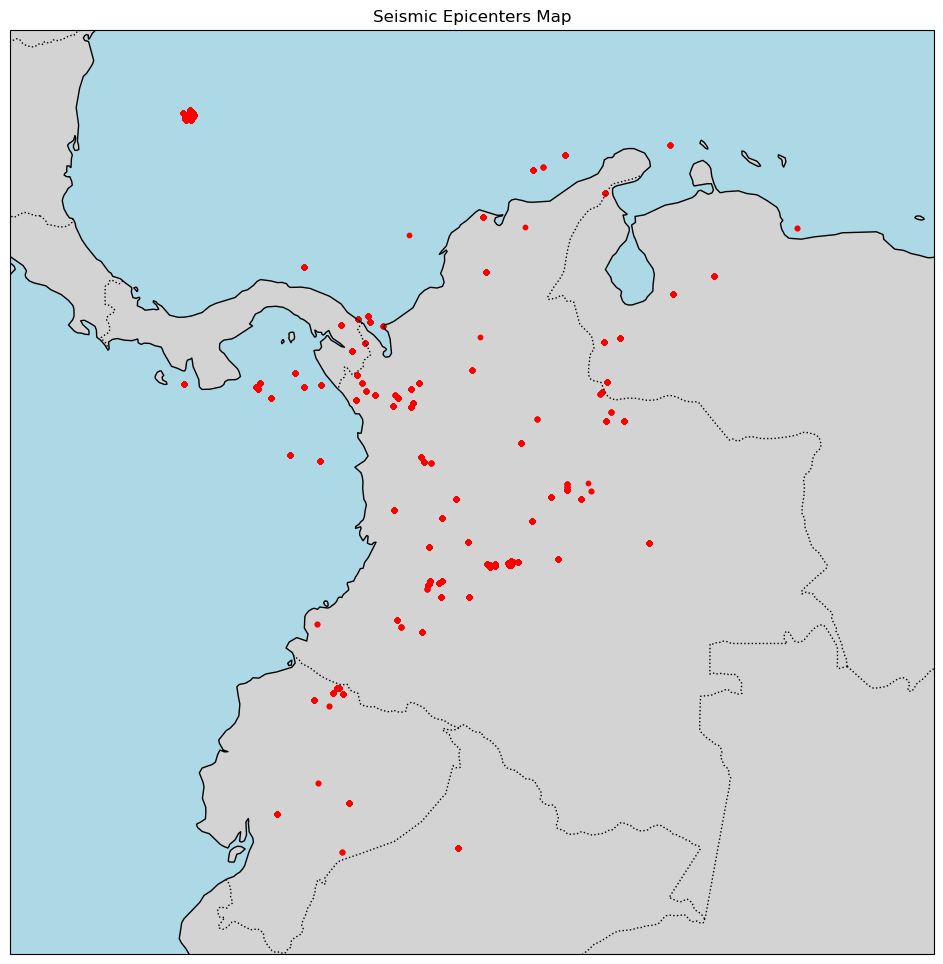

In [34]:
plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-85, -65, -5, 15])  # límites en grados (ej: norte de Suramérica)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

plt.scatter(df_Col["Epicenter Longitude (deg; positive E)"], df_Col["Epicenter Latitude (deg; positive N)"], 
            c="red", s=10, transform=ccrs.PlateCarree())

plt.title("Seismic Epicenters Map")
plt.show()

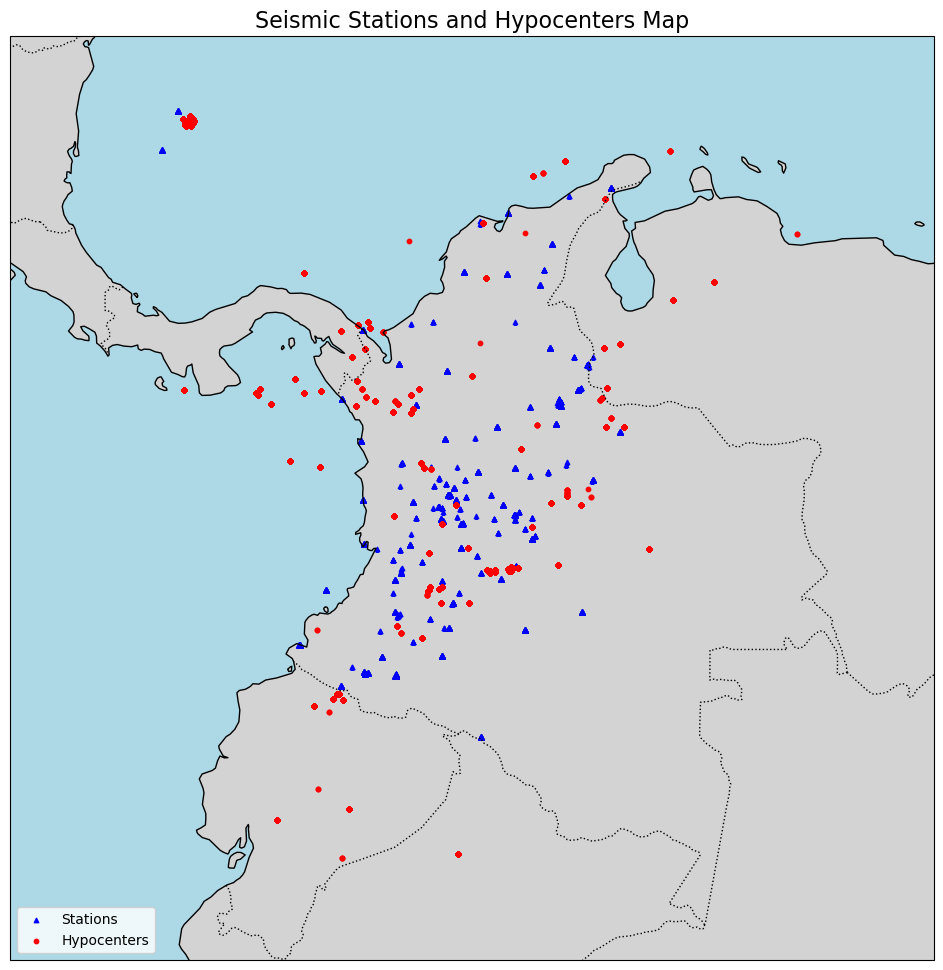

In [35]:
plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites opcionales: norte de Suramérica
ax.set_extent([-85, -65, -5, 15])  

# Agregar elementos del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Estaciones (ej. en azul)
plt.scatter(df_Col["Station Longitude (deg positive E)"], df_Col["Station Latitude (deg positive N)"], 
            c="blue", s=10, marker="^", 
            label="Stations", transform=ccrs.PlateCarree())

# Hipocentros (ej. en rojo)
plt.scatter(df_Col["Epicenter Longitude (deg; positive E)"], df_Col["Epicenter Latitude (deg; positive N)"], 
            c="red", s=10, marker="o", 
            label="Hypocenters", transform=ccrs.PlateCarree())

# Título y leyenda
plt.title("Seismic Stations and Hypocenters Map", fontsize=16)
plt.legend(loc="lower left")

plt.show()


In [36]:
df_Col = df_Col[df_Col['T_0.01_RotD50']>=1e-7]

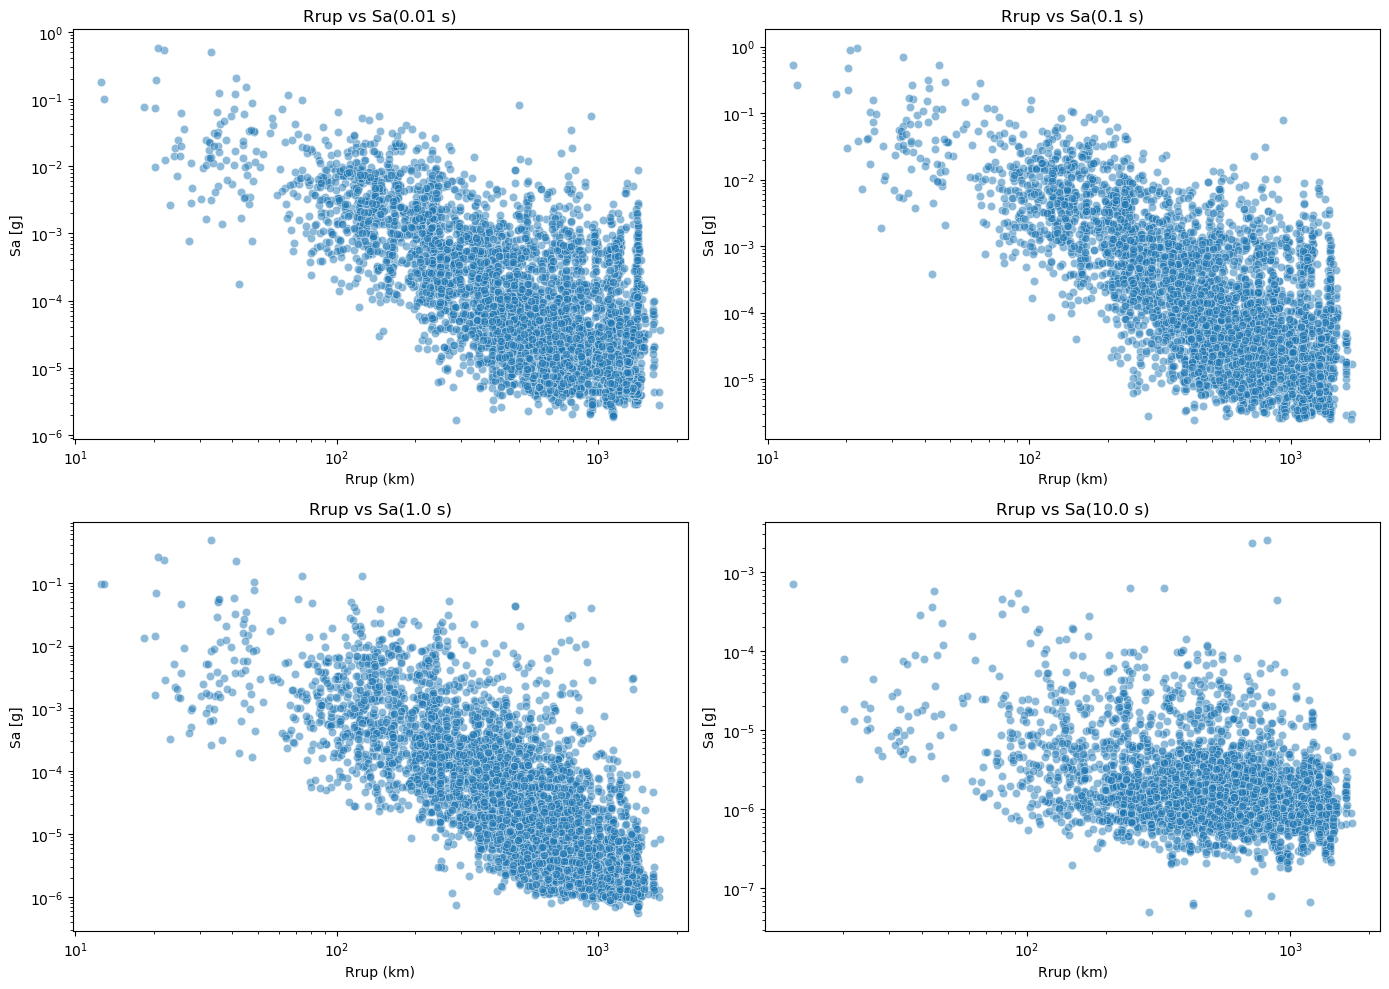

In [37]:
# --- 4. Sa(T) vs Distancia (Rrup) ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.scatterplot(x="Rrup_OpenQuake", y=col, data=df_Col, alpha=0.5, ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"Rrup vs Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Rrup (km)")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

## Full database

In [38]:
df

Hypocenter Latitude (deg)  Hypocenter Longitude (deg)  \
0                       46.61000                  -111.96000   
2                       40.40000                  -125.10000   
4                       40.30000                  -124.80000   
5                       32.76010                  -115.41620   
10                      40.28300                  -124.80000   
...                          ...                         ...   
21293                   37.86037                  -122.23589   
21294                   37.86037                  -122.23589   
21295                   37.86037                  -122.23589   
21296                   37.86037                  -122.23589   
21297                   35.81700                  -120.36500   

       Station Latitude  Station Longitude  Hypocenter Depth (km)  Magnitude  \
0              46.58000          -112.0300                  6.000       6.00   
2              40.57600          -124.2630                 10.000       5.80   
4              40.57600          -124.2630                 10.000       5.50   
5              32.79400          -115.5490                  8.800       6.95   
10             40.57600          -124.2630                 10.000       5.80   
...                 ...                ...                    ...        ...   
21293          37.58230          -122.4201                  8.465       3.60   
21294          37.40370          -122.1760                  8.465       3.60   
21295          37.58640          -122.5022                  8.465       3.60   
21296          37.94910          -122.4085                  8.465       3.60   
21297          35.21263          -120.8553                  8.100       6.00   

       Rhypo_OpenQuake  Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  \
0              8.71000            2.86           3       0.161934  ...   
2             74.17000           71.57           4       0.040997  ...   
4             55.78000           53.58           4       0.122486  ...   
5             15.69000            6.09           4       0.234619  ...   
10            56.85000           53.77           4       0.107289  ...   
...                ...             ...         ...            ...  ...   
21293         35.89050           35.63           2       0.005176  ...   
21294         51.66153           51.36           3       0.000505  ...   
21295         39.34073           39.13           3       0.003058  ...   
21296         19.97517           19.44           2       0.001620  ...   
21297         81.00000           78.32           3       0.010478  ...   

       T_0.5_RotD50  T_0.75_RotD50  T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  \
0          0.143020       0.092829      0.101136      0.059109      0.035895   
2          0.082295       0.056946      0.035785      0.016157      0.009347   
4          0.223093       0.091499      0.093659      0.026785      0.013654   
5          0.629952       0.435350      0.351286      0.197357      0.215745   
10         0.172930       0.124190      0.085661      0.040947      0.019499   
...             ...            ...           ...           ...           ...   
21293      0.001476       0.000493      0.000260      0.000114           NaN   
21294      0.000350       0.000166      0.000093      0.000043      0.000016   
21295      0.000883       0.000366      0.000123      0.000052      0.000032   
21296      0.000810       0.000282      0.000159      0.000067      0.000032   
21297      0.030253       0.017435      0.009625      0.005255      0.003526   

       T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  
0          0.015257      0.007987      0.004644      0.003037            NaN  
2          0.002960           NaN           NaN           NaN            NaN  
4               NaN           NaN           NaN           NaN            NaN  
5          0.106360      0.046965           NaN           NaN            NaN  
10              NaN           Na

In [39]:
df = df.rename(columns={"Hypocenter Latitude (deg)": "Seismic Latitude"})
df = df.rename(columns={"Hypocenter Longitude (deg)": "Seismic Longitude"})
df_Col = df_Col.rename(columns={"Epicenter Latitude (deg; positive N)": "Seismic Latitude"})
df_Col = df_Col.rename(columns={"Epicenter Longitude (deg; positive E)": "Seismic Longitude"})
df_Col = df_Col.rename(columns={"Station Latitude (deg positive N)": "Station Latitude"})
df_Col = df_Col.rename(columns={"Station Longitude (deg positive E)": "Station Longitude"})

In [40]:
inputs = df.columns[0:9]
inputs

Index(['Seismic Latitude', 'Seismic Longitude', 'Station Latitude',
       'Station Longitude', 'Hypocenter Depth (km)', 'Magnitude',
       'Rhypo_OpenQuake', 'Rrup_OpenQuake', 'Soil_Class'],
      dtype='object')

In [41]:
var = inputs.tolist() + outputs.tolist()
df_Col=df_Col[var]

In [42]:
df_Col['origen'] = '1'
df['origen'] = '0'

In [43]:
df_Col

Seismic Latitude  Seismic Longitude  Station Latitude  \
0                7.105            -76.665            5.6630   
1                7.364            -77.380            5.6630   
2                7.364            -77.380            5.2614   
3                5.621            -75.895            5.2614   
4                4.374            -73.708            5.2614   
...                ...                ...               ...   
8798             3.440            -74.190            1.1890   
8799             3.430            -74.200            1.1890   
8800             3.410            -74.170            1.2097   
8801             7.270            -78.640            1.2097   
8802            13.160            -81.050            3.3721   

      Station Longitude  Hypocenter Depth (km)  Magnitude  Rhypo_OpenQuake  \
0              -75.8970                   14.0     6.0202       181.353681   
1              -75.8970                   14.0     6.2562       254.752031   
2              -75.8125                   14.0     6.2562       295.168858   
3              -75.8125                   50.6     5.1307        67.842661   
4              -75.8125                   14.7     5.8671       254.069428   
...                 ...                    ...        ...              ...   
8798           -77.3220                   10.0     4.1000       428.905798   
8799           -77.3220                   18.0     4.0000       427.631871   
8800           -77.2563                   15.0     4.3000       421.640421   
8801           -77.2563                    4.0     5.1000       691.759807   
8802           -76.5300                   10.0     5.6321      1196.423818   

      Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  T_0.75_RotD50  \
0         174.684394           1       0.004946  ...       0.008565   
1         244.405678           1       0.001851  ...       0.002285   
2         284.525886           2       0.001642  ...       0.002577   
3          65.201764           2       0.113558  ...       0.009564   
4         247.402211           2       0.000849  ...       0.002152   
...              ...         ...            ...  ...            ...   
8798      428.091130           5       0.000004  ...       0.000002   
8799      426.956629           5       0.000005  ...       0.000002   
8800      420.098899           5       0.000009  ...       0.000013   
8801      689.662530           5       0.000015  ...       0.000003   
8802     1188.735771           5       0.000139  ...       0.000003   

      T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  T_3.0_RotD50  T_4.0_RotD50  \
0         0.011731      0.008412      0.003945           NaN           NaN   
1         0.001380      0.000781      0.000327           NaN           NaN   
2         0.001191      0.000454      0.000275           NaN           NaN   
3         0.005405      0.001989      0.001150           NaN           NaN   
4         0.002154      0.001308      0.000420           NaN           NaN   
...            ...           ...           ...           ...           ...   
8798      0.000001      0.000001      0.000001  1.087456e-06  6.427327e-07   
8799      0.000001      0.000001      0.000001  9.019724e-07  4.762469e-07   
8800      0.000008      0.000003      0.000004  2.928746e-06  2.381339e-06   
8801      0.000002      0.000002      0.000002  8.369194e-07  4.056827e-07   
8802      0.000003      0.000002      0.000001  7.131480e-07  3.910684e-07   

      T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  origen  
0              NaN           NaN            NaN       1  
1              NaN           NaN            NaN       1  
2              NaN           NaN            NaN       1  
3              NaN           NaN            NaN       1  
4              NaN           NaN            NaN       1  
...            ...           ...            ...     ...  
8798  3.359714e-07  2.371388e-07   6.632653e-08       1  
8799  2.486122e-07  1.713980e-07   6.234694e-08       1  


In [44]:
df_total = pd.concat([df, df_Col], ignore_index=True)

In [45]:
df_total

Seismic Latitude  Seismic Longitude  Station Latitude  \
0               46.6100          -111.9600           46.5800   
1               40.4000          -125.1000           40.5760   
2               40.3000          -124.8000           40.5760   
3               32.7601          -115.4162           32.7940   
4               40.2830          -124.8000           40.5760   
...                 ...                ...               ...   
17507            3.4400           -74.1900            1.1890   
17508            3.4300           -74.2000            1.1890   
17509            3.4100           -74.1700            1.2097   
17510            7.2700           -78.6400            1.2097   
17511           13.1600           -81.0500            3.3721   

       Station Longitude  Hypocenter Depth (km)  Magnitude  Rhypo_OpenQuake  \
0              -112.0300                    6.0     6.0000         8.710000   
1              -124.2630                   10.0     5.8000        74.170000   
2              -124.2630                   10.0     5.5000        55.780000   
3              -115.5490                    8.8     6.9500        15.690000   
4              -124.2630                   10.0     5.8000        56.850000   
...                  ...                    ...        ...              ...   
17507           -77.3220                   10.0     4.1000       428.905798   
17508           -77.3220                   18.0     4.0000       427.631871   
17509           -77.2563                   15.0     4.3000       421.640421   
17510           -77.2563                    4.0     5.1000       691.759807   
17511           -76.5300                   10.0     5.6321      1196.423818   

       Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  T_0.75_RotD50  \
0            2.860000           3       0.161934  ...       0.092829   
1           71.570000           4       0.040997  ...       0.056946   
2           53.580000           4       0.122486  ...       0.091499   
3            6.090000           4       0.234619  ...       0.435350   
4           53.770000           4       0.107289  ...       0.124190   
...               ...         ...            ...  ...            ...   
17507      428.091130           5       0.000004  ...       0.000002   
17508      426.956629           5       0.000005  ...       0.000002   
17509      420.098899           5       0.000009  ...       0.000013   
17510      689.662530           5       0.000015  ...       0.000003   
17511     1188.735771           5       0.000139  ...       0.000003   

       T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  T_3.0_RotD50  T_4.0_RotD50  \
0          0.101136      0.059109      0.035895  1.525704e-02  7.987177e-03   
1          0.035785      0.016157      0.009347  2.959554e-03           NaN   
2          0.093659      0.026785      0.013654           NaN           NaN   
3          0.351286      0.197357      0.215745  1.063604e-01  4.696507e-02   
4          0.085661      0.040947      0.019499           NaN           NaN   
...             ...           ...           ...           ...           ...   
17507      0.000001      0.000001      0.000001  1.087456e-06  6.427327e-07   
17508      0.000001      0.000001      0.000001  9.019724e-07  4.762469e-07   
17509      0.000008      0.000003      0.000004  2.928746e-06  2.381339e-06   
17510      0.000002      0.000002      0.000002  8.369194e-07  4.056827e-07   
17511      0.000003      0.000002      0.000001  7.131480e-07  3.910684e-07   

       T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  origen  
0      4.643577e-03  3.036607e-03            NaN       0  
1               NaN           NaN            NaN       0  
2               NaN           NaN            NaN       0  
3               NaN           NaN            NaN       0  
4               NaN           NaN            NaN       0  
...             ...           ...            ...     ...  
17507  3.359714e-07  2.371388e-07   6.632653e-08       1  
175

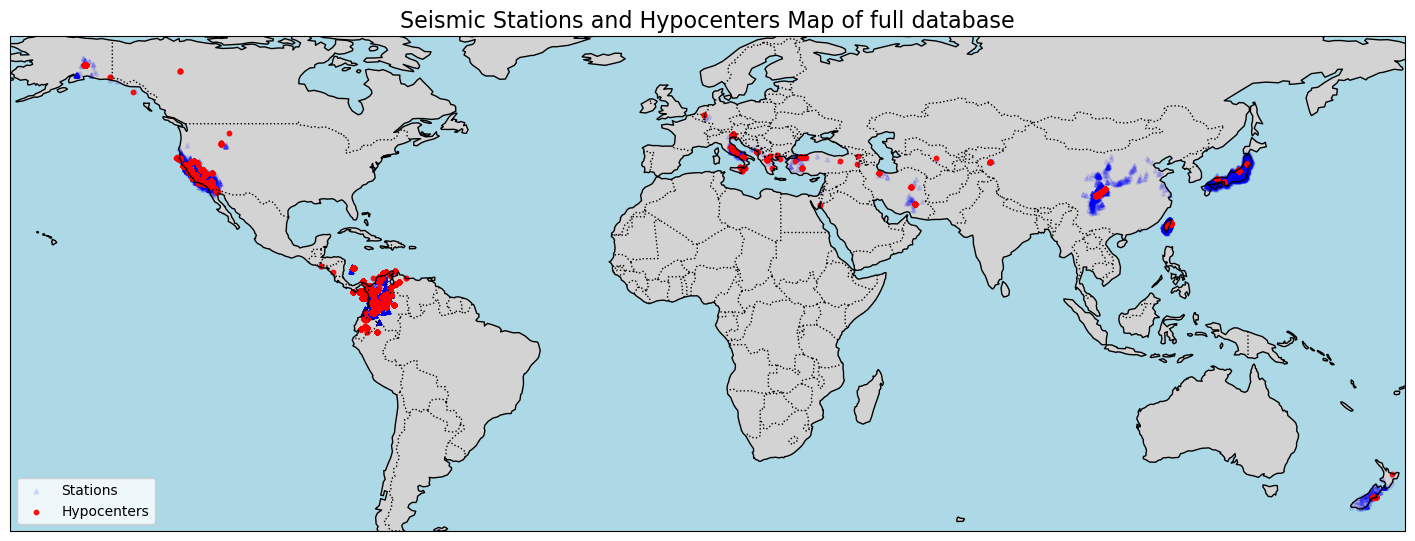

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites opcionales: norte de Suramérica
# ax.set_extent([-85, -65, -5, 15])  
#ax.set_extent([-50, -50,50, 50])
# Agregar elementos del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Estaciones (ej. en azul)
plt.scatter(df_total["Station Longitude"], df_total["Station Latitude"], 
            c="blue", s=10, marker="^",  alpha=0.1,
            label="Stations", transform=ccrs.PlateCarree())

# Hipocentros (ej. en rojo)
plt.scatter(df_total["Seismic Longitude"], df_total["Seismic Latitude"], 
            c="red", s=10, marker="o", alpha=0.9,
            label="Hypocenters", transform=ccrs.PlateCarree())

# Título y leyenda
plt.title("Seismic Stations and Hypocenters Map of full database", fontsize=16)
plt.legend(loc="lower left")

plt.show()

In [47]:
df_total.drop(columns=['Seismic Latitude', 'Seismic Longitude', 'Station Latitude','Station Longitude'], inplace=True)

In [48]:
inputs = df_total.columns[0:5].append(df.columns[[31]])

In [49]:
inputs

Index(['Hypocenter Depth (km)', 'Magnitude', 'Rhypo_OpenQuake',
       'Rrup_OpenQuake', 'Soil_Class', 'origen'],
      dtype='object')

In [50]:
df_total.describe().T

count        mean         std           min  \
Hypocenter Depth (km)  17512.0   10.938102    6.966794  2.000000e-02   
Magnitude              17512.0    5.331933    1.179870  3.200000e+00   
Rhypo_OpenQuake        17512.0  255.264153  310.215583  2.060000e+00   
Rrup_OpenQuake         17512.0  246.264305  307.906812  5.000000e-02   
Soil_Class             17512.0    2.961398    0.866574  1.000000e+00   
T_0.01_RotD50          17512.0    0.032540    0.086543  3.667953e-07   
T_0.02_RotD50          17512.0    0.033223    0.089849  3.656215e-07   
T_0.03_RotD50          17512.0    0.035016    0.097717  3.665763e-07   
T_0.04_RotD50          17512.0    0.037626    0.106902  3.686024e-07   
T_0.05_RotD50          17512.0    0.040910    0.115792  3.717809e-07   
T_0.075_RotD50         17512.0    0.051336    0.146187  3.766346e-07   
T_0.1_RotD50           17511.0    0.060300    0.167057  3.959980e-07   
T_0.15_RotD50          17507.0    0.070373    0.192645  4.496561e-07   
T_0.2_RotD50           17503.0    0.072711    0.196570  6.468004e-07   
T_0.25_RotD50          17501.0    0.071075    0.193024  6.532471e-07   
T_0.3_RotD50           17497.0    0.068939    0.188106  6.547189e-07   
T_0.4_RotD50           17493.0    0.061767    0.169640  6.748307e-07   
T_0.5_RotD50           17479.0    0.054973    0.152828  7.255787e-07   
T_0.75_RotD50          17458.0    0.042212    0.124380  6.769173e-07   
T_1.0_RotD50           17369.0    0.032393    0.095051  5.662867e-07   
T_1.5_RotD50           17148.0    0.020951    0.061411  2.865295e-07   
T_2.0_RotD50           16500.0    0.015441    0.046711  1.458209e-07   
T_3.0_RotD50           15223.0    0.010106    0.031218  1.346649e-07   
T_4.0_RotD50           13333.0    0.007700    0.022093  1.355982e-07   
T_5.0_RotD50           11829.0    0.006474    0.018745  1.077202e-07   
T_6.0_RotD50           10947.0    0.005624    0.015826  8.388087e-08   
T_10.0_RotD50           9124.0    0.002444    0.006957  2.038235e-08   

                             25%         50%         75%          max  
Hypocenter Depth (km)   7.213000   10.000000   13.100000    58.700000  
Magnitude               4.300000    5.106300    6.300000     7.900000  
Rhypo_OpenQuake        62.012500  135.592800  287.390670  1754.710000  
Rrup_OpenQuake         55.680000  125.980000  277.083461  1719.484836  
Soil_Class              2.000000    3.000000    3.000000     5.000000  
T_0.01_RotD50           0.000221    0.002909    0.023355     1.793158  
T_0.02_RotD50           0.000254    0.003004    0.023461     1.838349  
T_0.03_RotD50           0.000263    0.003105    0.024249     2.173418  
T_0.04_RotD50           0.000271    0.003270    0.025258     2.444077  
T_0.05_RotD50           0.000284    0.003569    0.026785     2.545878  
T_0.075_RotD50          0.000323    0.004317    0.033191     2.918479  
T_0.1_RotD50            0.000337    0.005054    0.039303     4.619663  
T_0.15_RotD50           0.000364    0.005817    0.047890     3.770822  
T_0.2_RotD50            0.000390    0.006215    0.050462     4.325432  
T_0.25_RotD50           0.000393    0.006073    0.050438     4.202180  
T_0.3_RotD50            0.000357    0.005501    0.049396     4.814835  
T_0.4_RotD50            0.000299    0.004552    0.043310     3.347242  
T_0.5_RotD50            0.000245    0.003630    0.037604     3.287620  
T_0.75_RotD50           0.000145    0.002310    0.028151     3.388009  
T_1.0_RotD50            0.000096    0.001578    0.021874     2.096978  
T_1.5_RotD50            0.000048    0.000788    0.014206     1.174380  
T_2.0_RotD50            0.000030    0.000565    0.010465     1.126811  
T_3.0_RotD50            0.000014    0.000345    0.006507     1.063239  
T_4.0_RotD50            0.000008    0.000320    0.005303     0.386233  
T_5.0_RotD50            0.000004    0.000287    0.004686     0.343812  
T_6.0_RotD50            0.000003    0.000296    0.004472     0.332038  
T_10.0_RotD50           0.000001    0.000180    0.001862     0.2

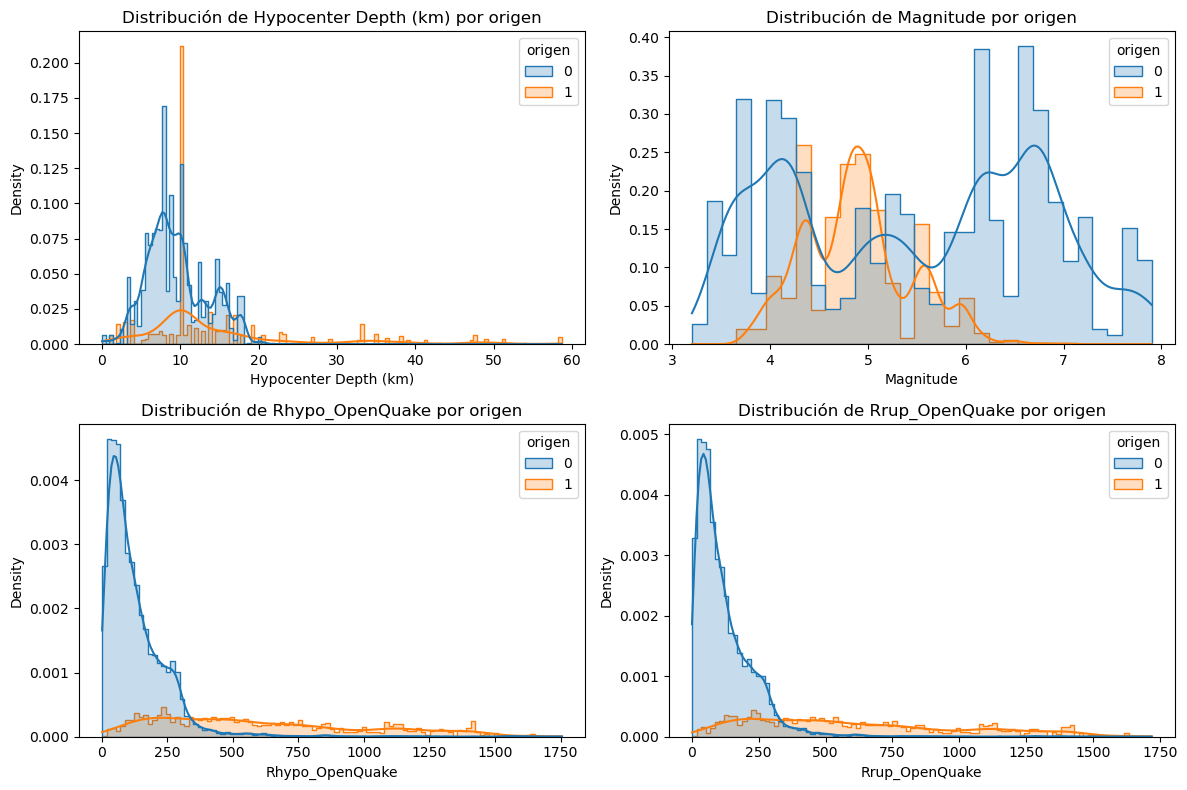

In [51]:
variables = ['Hypocenter Depth (km)', 'Magnitude', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas
axes = axes.flatten()  # pasar a arreglo 1D para iterar fácil

for i, var in enumerate(variables):
    sns.histplot(data=df_total, x=var, hue="origen", kde=True,
                 element="step", stat="density", ax=axes[i])
    axes[i].set_title(f"Distribución de {var} por origen")

plt.tight_layout()
plt.show()


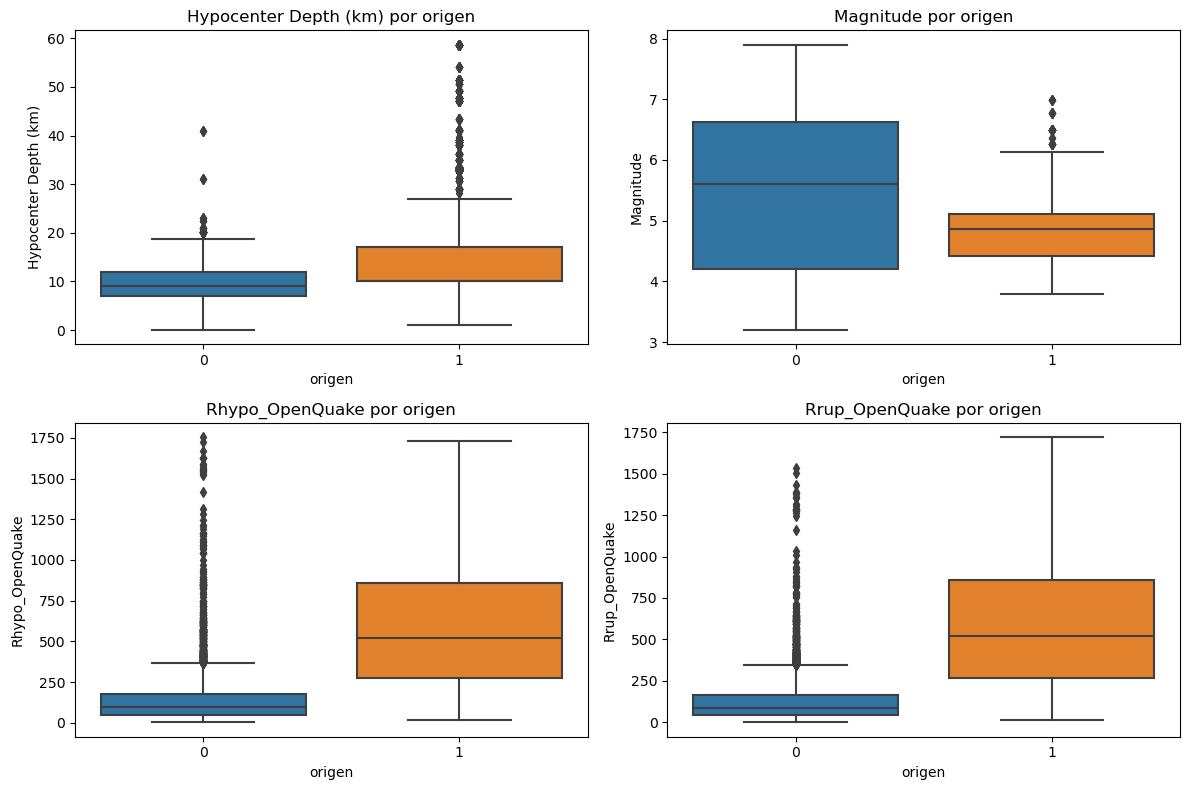

In [52]:
variables = ['Hypocenter Depth (km)', 'Magnitude', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df_total, x="origen", y=var, ax=axes[i])
    axes[i].set_title(f"{var} por origen")

plt.tight_layout()
plt.show()


origen  Soil_Class
0       2             2477
        3             7770
        4             2245
        5              401
1       1              838
        2             1153
        3             1426
        4              821
        5              381
dtype: int64


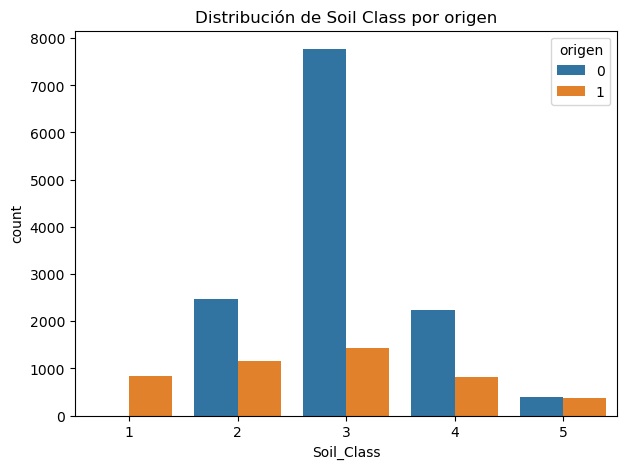

In [53]:
# Conteo absoluto
print(df_total.groupby(['origen', 'Soil_Class']).size())

# Gráfico
plt.figure(figsize=(7,5))
sns.countplot(data=df_total, x='Soil_Class', hue='origen')
plt.title("Distribución de Soil Class por origen")
plt.show()

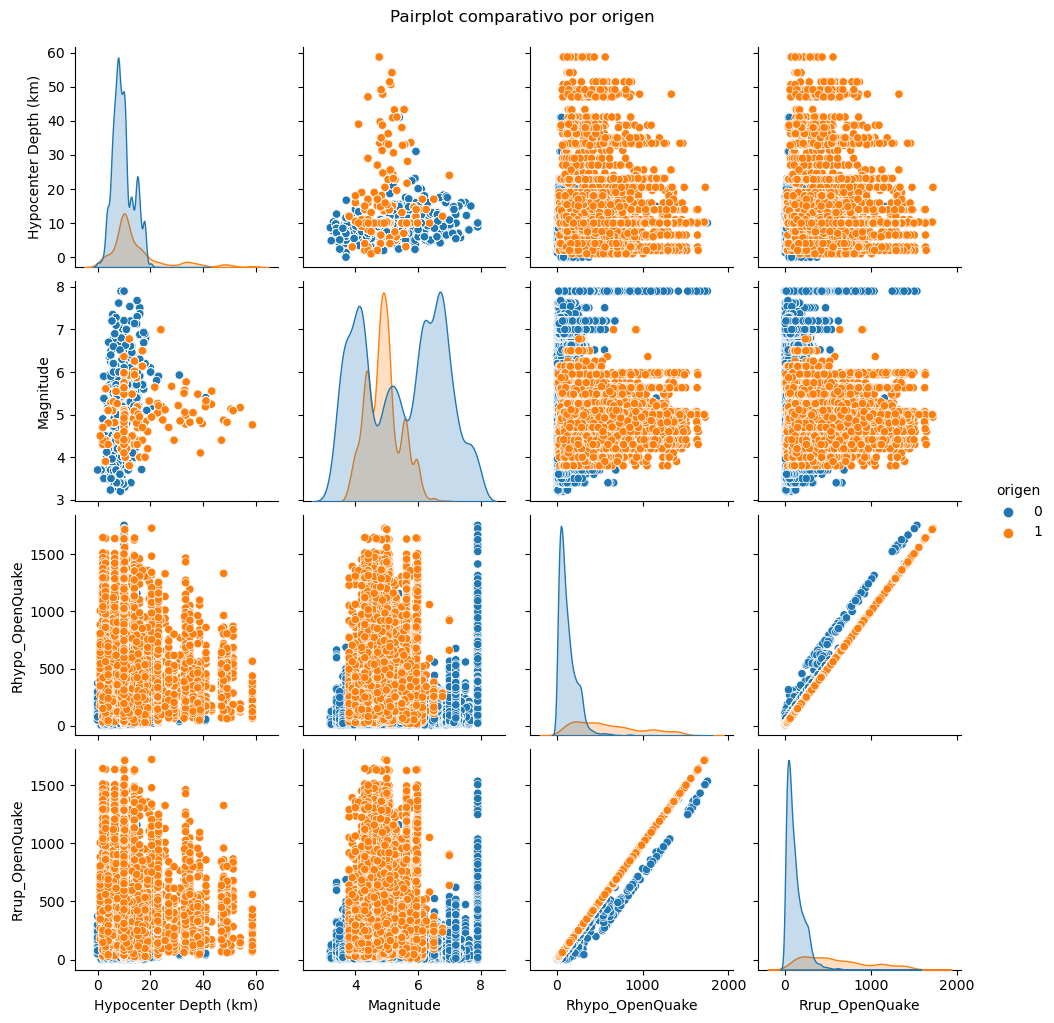

In [54]:
sns.pairplot(df_total, vars=variables, hue="origen", diag_kind="kde")
plt.suptitle("Pairplot comparativo por origen", y=1.02)
plt.show()


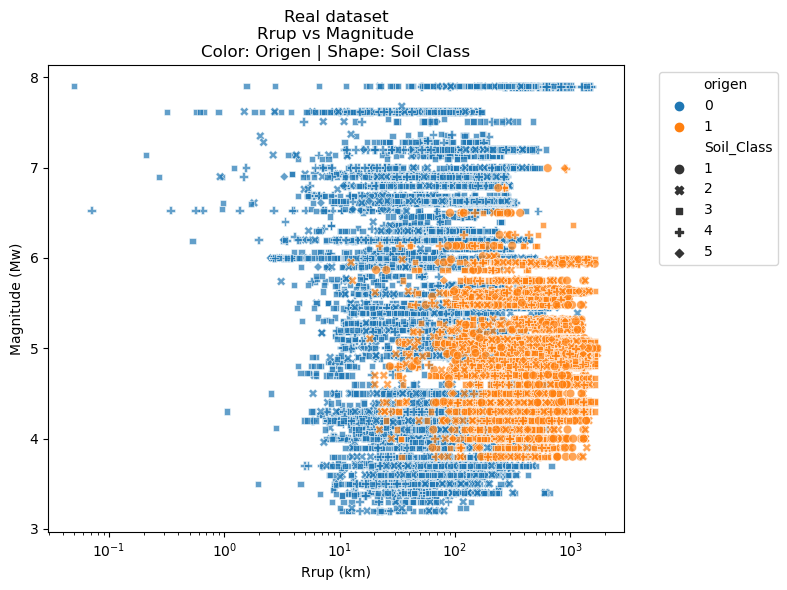

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_total,
    x="Rrup_OpenQuake", 
    y="Magnitude",
    hue="origen",          # Color según origen
    style="Soil_Class",    # Marcador según tipo de suelo
    alpha=0.7,             # Transparencia para ver densidad
    s=40                  # Tamaño de puntos
)

plt.xscale("log")  # Escala logarítmica en X
plt.title("Real dataset\nRrup vs Magnitude\nColor: Origen | Shape: Soil Class")
plt.xlabel("Rrup (km)")
plt.ylabel("Magnitude (Mw)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover leyenda afuera
plt.tight_layout()
plt.show()


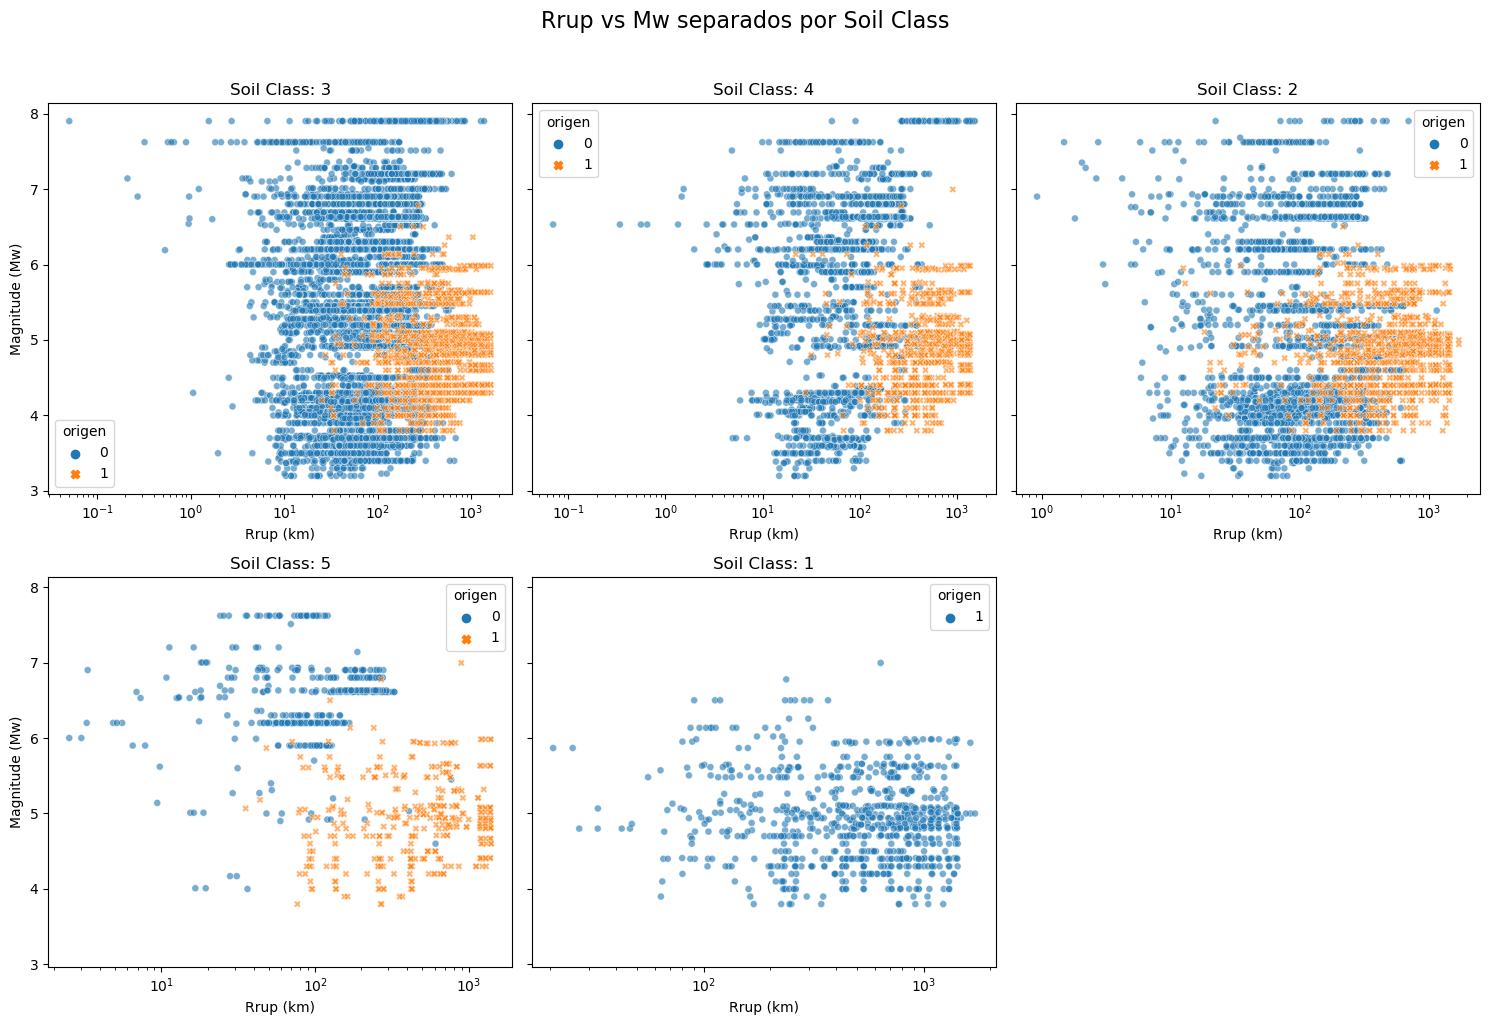

In [56]:
soil_classes = df_total['Soil_Class'].unique()[:5]  # tomar 5 tipos de suelo
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, soil in enumerate(soil_classes):
    subset = df_total[df_total['Soil_Class'] == soil]
    sns.scatterplot(
        data=subset,
        x="Rrup_OpenQuake", 
        y="Magnitude",
        hue="origen",      
        style="origen",    
        alpha=0.6,
        s=25,
        ax=axes[i]
    )
    axes[i].set_xscale("log")
    axes[i].set_title(f"Soil Class: {soil}")
    axes[i].set_xlabel("Rrup (km)")
    if i % 3 == 0:  # primera columna de cada fila muestra Y label
        axes[i].set_ylabel("Magnitude (Mw)")
    else:
        axes[i].set_ylabel("")

# Usar el subplot 6 para la leyenda
axes[-1].axis("off")  # lo apagamos

plt.suptitle("Rrup vs Mw separados por Soil Class", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


### Logarithm transformation to Rrup and Rhypo variables.

In [57]:
df_total['Rhypo_OpenQuake'] = np.log(df_total['Rhypo_OpenQuake'])  # +1 para evitar log(0)
df_total['Rrup_OpenQuake'] = np.log(df_total['Rrup_OpenQuake'])  

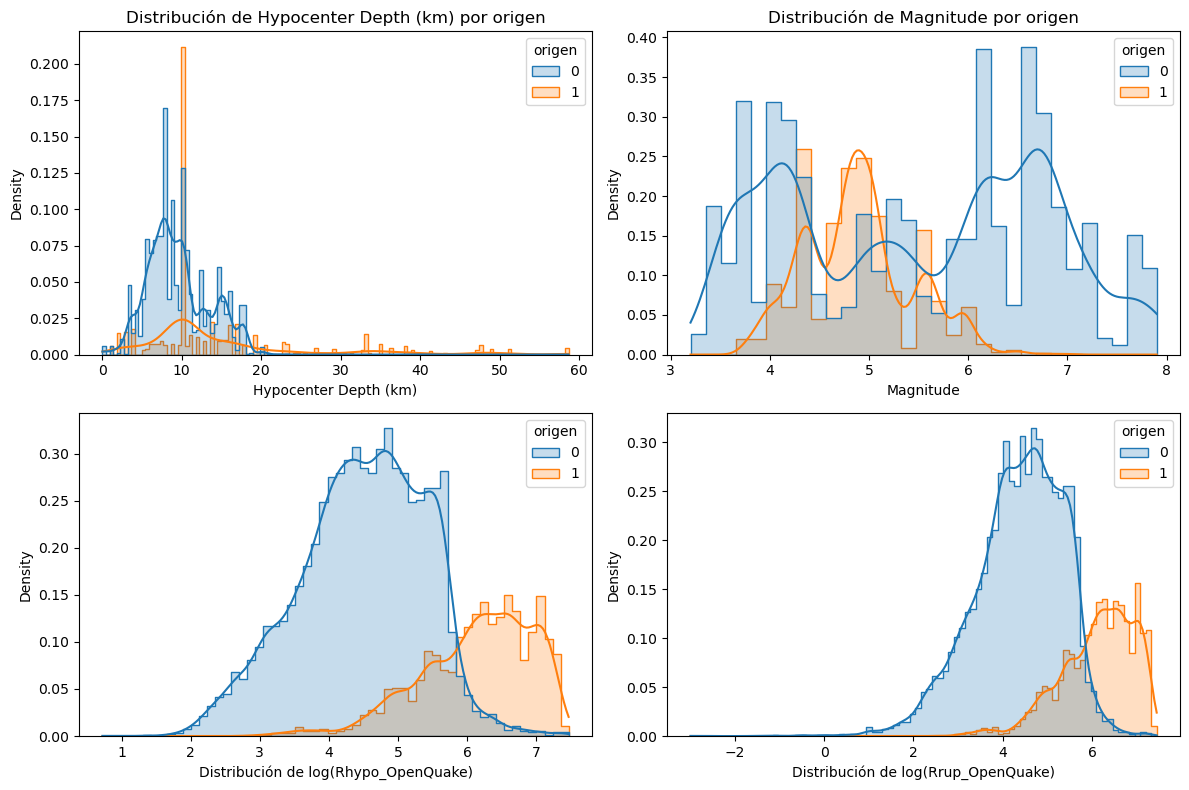

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas
axes = axes.flatten()  # pasar a arreglo 1D para iterar fácil

for i, var in enumerate(variables):
    sns.histplot(data=df_total, x=var, hue="origen", kde=True,
                 element="step", stat="density", ax=axes[i])
    if var in ['Rhypo_OpenQuake', 'Rrup_OpenQuake']:
        axes[i].set_xlabel(f"Distribución de log({var})")
    else:
        axes[i].set_title(f"Distribución de {var} por origen")

plt.tight_layout()
plt.show()


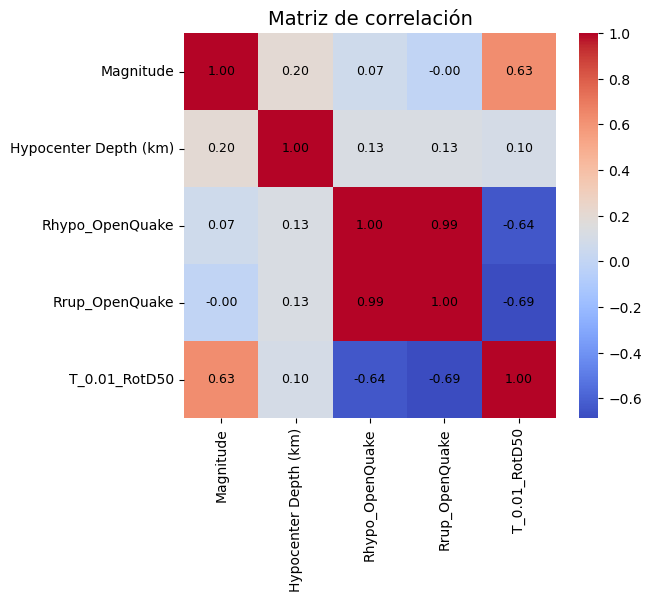

In [59]:
corr = df_total[['Magnitude','Hypocenter Depth (km)','Rhypo_OpenQuake','Rrup_OpenQuake','T_0.01_RotD50']].corr(method='spearman')

plt.figure(figsize=(6,5))
ax = sns.heatmap(corr, annot=False, cmap="coolwarm")

# Anotar manualmente
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j+0.5, i+0.5, f"{corr.iloc[i,j]:.2f}", 
                ha='center', va='center', color='black', fontsize=9)

plt.title("Matriz de correlación", fontsize=14)
plt.show()

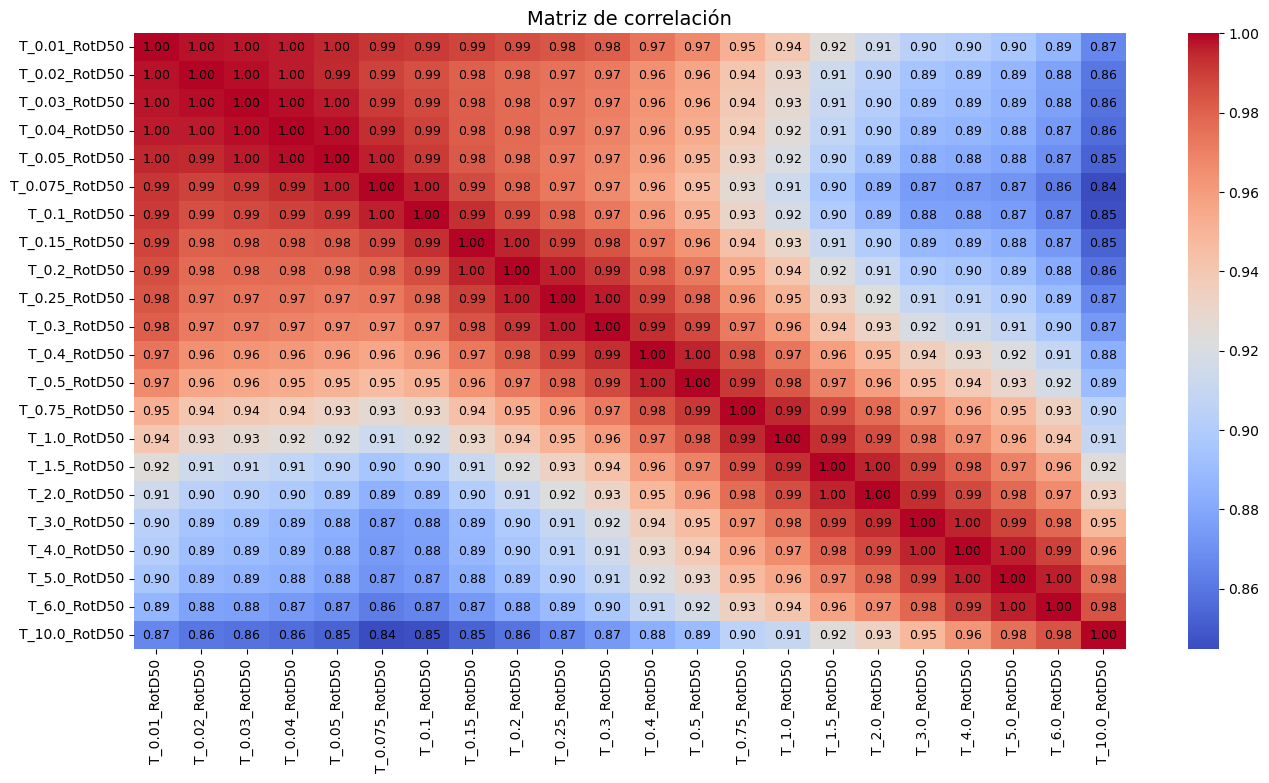

In [64]:
corr = df_total[outputs].corr(method='spearman')

plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, annot=False, cmap="coolwarm")

# Anotar manualmente
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j+0.5, i+0.5, f"{corr.iloc[i,j]:.2f}", 
                ha='center', va='center', color='black', fontsize=9)

plt.title("Matriz de correlación", fontsize=14)
plt.show()


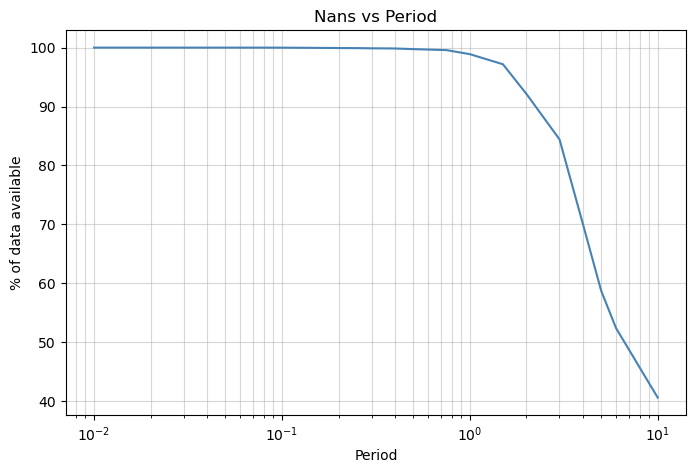

In [60]:
# Extraer solo las columnas de periodo
period_cols = [c for c in df.columns if c.startswith("T_") and c.endswith("_RotD50")]

# Calcular % de NaNs por columna
missing_pct = 100-df[period_cols].isna().mean() * 100

# Convertir nombres de columnas a valores numéricos de periodo
periods = [float(c.split("_")[1]) for c in period_cols]

# Graficar
plt.figure(figsize=(8,5))
plt.plot(periods, missing_pct, linestyle="-", color="steelblue")

plt.xscale("log")  
plt.xlabel("Period")
plt.ylabel("% of data available")
plt.title("Nans vs Period")
plt.grid(True, which="both", linestyle="-", alpha=0.5)

plt.show()


## Por qué no se realiza imputación de valores de NA

Text(0.5, 1.0, 'Boxplot Sa(10s) - full dataset')

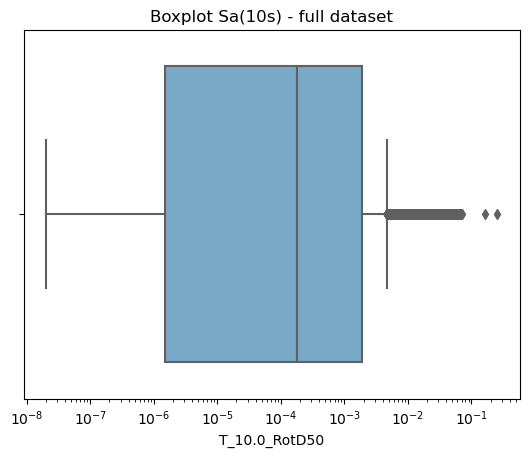

In [61]:
sns.boxplot(x="T_10.0_RotD50", data=df_total, palette='Blues')
plt.xscale("log")
plt.title("Boxplot Sa(10s) - full dataset")

In [62]:
print("Desviación estándar:", df_total["T_10.0_RotD50"].std(skipna=True))

Desviación estándar: 0.006957097791757643


Como se puede observar, existe una gran dispersión de los datos para periodos donde las pérdidas empiezan a ser mayores. Indicando así que cualquier tipo de imputación vaya a afectar considerablemente a la distribución de los datos, 

In [63]:
col = "T_10.0_RotD50"

median_global = df_total[col].median(skipna=True)
print("Mediana global usada para imputar:", median_global)

df_total["T_10.0_RotD50_imputed"] = df_total[col].fillna(median_global)

Mediana global usada para imputar: 0.000180275


Text(0.5, 1.0, 'Boxplot Sa(10s) - full dataset')

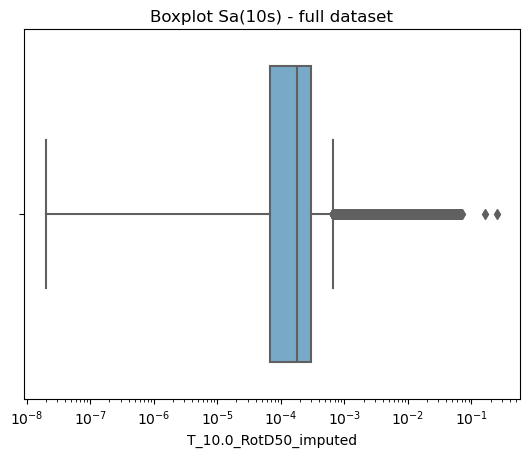

In [64]:
sns.boxplot(x="T_10.0_RotD50_imputed", data=df_total, palette='Blues')
plt.xscale("log")
plt.title("Boxplot Sa(10s) - full dataset")

In [65]:
print("Desviación estándar:", df_total["T_10.0_RotD50_imputed"].std(skipna=True))

Desviación estándar: 0.0051473589517547465


Como se puede evidenciar, uno de los métodos de imputación mas usados, (mediana) no sería del todo funcional ya que esto haría que el entrenamiento luego sea sesgado. La desviación estándar cayó casi un 27% que es una compresión bastante relevante

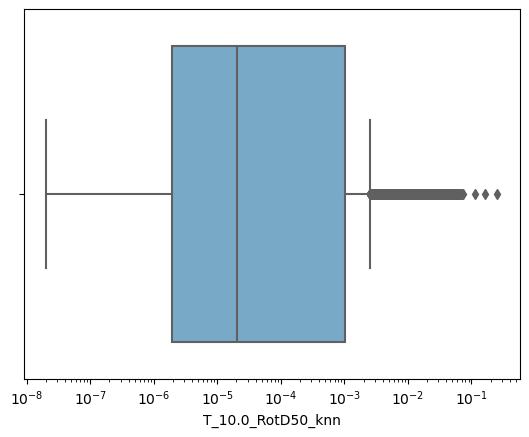

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

predictors = ["Magnitude", "Rrup_OpenQuake", "Rhypo_OpenQuake", "Soil_Class"]

df_total["T_10.0_RotD50_knn"] = df_total["T_10.0_RotD50"]

scaler = StandardScaler()
X = scaler.fit_transform(df_total[predictors])

import numpy as np
import pandas as pd
X_all = np.column_stack([X, df_total["T_10.0_RotD50_knn"]])

imp = KNNImputer(n_neighbors=5, weights="distance")
X_imp = imp.fit_transform(X_all)

df_total["T_10.0_RotD50_knn"] = X_imp[:, -1]
sns.boxplot(x="T_10.0_RotD50_knn", data=df_total, palette='Blues')
plt.xscale("log")

In [68]:
print("Desviación estándar:", df_total["T_10.0_RotD50_knn"].std(skipna=True))

Desviación estándar: 0.005544522799054825


Haciendo la imputación usando vecinos cercanos, se puede ver que también disminuye la desviación estándar a pesar de que gráficamente no se logren observar tantos cambios. La caída representa casi el 20% lo que sigue siendo considerable. <br>
Con esto, una de las razones por las que no se debería imputar valores de Sa faltantes es porque afectarán enormemente la distribución. A esto añadirle que la columna con T= 10.0s no es la única que tiene valores faltantes. Imputar todas las columnas afectará al entrenamiento y predicción de los modelos sesgándolos a datos mas ordenados cuando esto está muy lejos de la realidad.

Además, imputar realmente no tendría sentido ya que el espectro no existiría mas allá de lo que señala la variable de Tmax. Dado caso se imputase, sería equivalente a inventar energía espectral. el proveedor ya dice que para un T > Tmax: “con la parte útil del registro disponible, el contenido a baja frecuencia no es fiable”. por lo tanto no se debería de cambiar la información.